In [423]:
#  all imports 

import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
import time
import pandas as pd 
import math
from scipy.interpolate import approximate_taylor_polynomial
import scipy.linalg as spl
import scipy.stats as stat
from scipy.stats import linregress
from scipy.integrate import solve_ivp

## Taylor Polynomials
Lets plot the Taylor approximation of $\frac{1}{1+x}$ of degree $3$ centered at $0$, for $x$ in $[0,5]$.

In [424]:
# define the function and its derivatives

def func(x):
    return 1 / (1 + x)

def taylor_approximation(x, degree):
    approximation = 0
    for n in range(degree + 1):
        approximation += (-1)**n * x**n
    return approximation

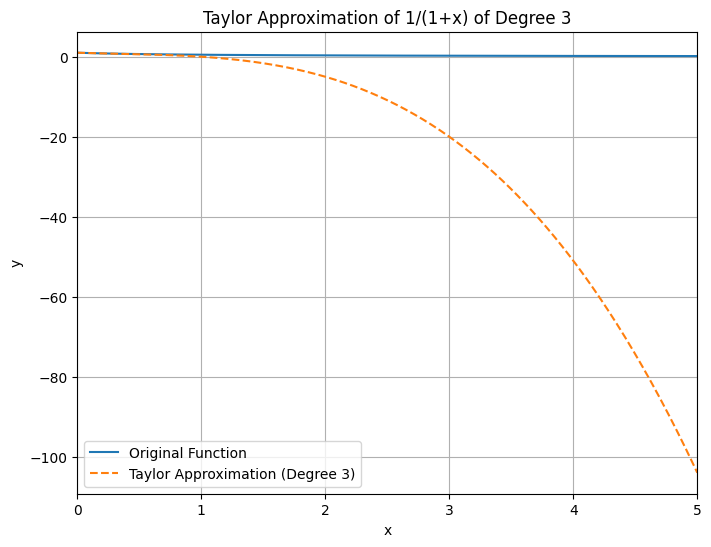

In [425]:
# Now lets create x-values

x_values = np.linspace(0, 5, 500)

# and y values for the original function and its approximation

y_func = func(x_values)
y_taylor = taylor_approximation(x_values, 3)

# plotting the results

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_func, label='Original Function')
plt.plot(x_values, y_taylor, label='Taylor Approximation (Degree 3)', linestyle='--')
plt.title('Taylor Approximation of 1/(1+x) of Degree 3')
plt.xlabel('x')
plt.ylabel('y')
# x-axis limits
plt.xlim(0, 5) 
plt.legend()
plt.grid(True)
plt.show()

### Great. Now lets find and plot on the $x-$interval $[0,2\pi]$: $\sin(x)$, $P_1(x)$, $P_2(x)$, $P_3(x), P_4(x)$, where the Taylor polynomials are centered at $\pi$.

In [426]:
def func(x):
    return np.sin(x)

def taylor_approximation(x, degree, center):
    approximation = 0
    for n in range(degree + 1):
        if n % 2 == 1:
            sign = -1 if n // 2 % 2 == 0 else 1
            approximation += sign * (x - center)**n / math.factorial(n)
    return approximation

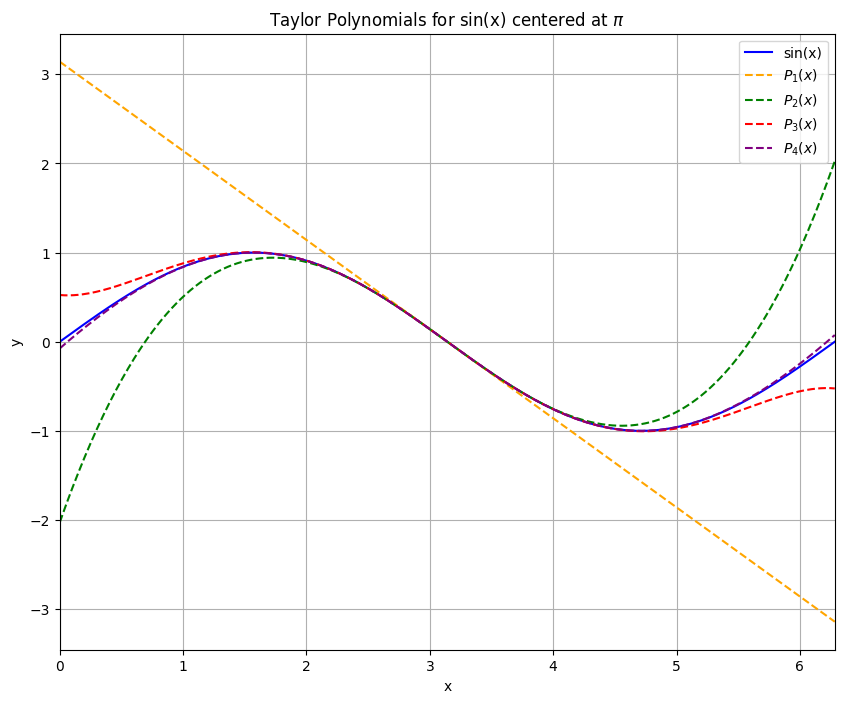

In [427]:
x_values = np.linspace(0, 2*np.pi, 500)
y_func = func(x_values)

# degree = 1
y_taylor_1 = taylor_approximation(x_values, 1, np.pi) 

#degree = 3
y_taylor_2 = taylor_approximation(x_values, 3, np.pi) 

# degree = 5
y_taylor_3 = taylor_approximation(x_values, 5, np.pi) 

# degree = 7
y_taylor_4 = taylor_approximation(x_values, 7, np.pi) 

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_func, label='sin(x)', linestyle='-', color='blue')
plt.plot(x_values, y_taylor_1, label='$P_1(x)$', linestyle='--', color='orange')
plt.plot(x_values, y_taylor_2, label='$P_2(x)$', linestyle='--', color='green')
plt.plot(x_values, y_taylor_3, label='$P_3(x)$', linestyle='--', color='red')
plt.plot(x_values, y_taylor_4, label='$P_4(x)$', linestyle='--', color='purple')
plt.title(r'Taylor Polynomials for sin(x) centered at $\pi$')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 2*np.pi)
plt.legend()
plt.grid(True)
plt.show()

# Finding and plotting Taylor polynomials with bounded errors. 
1. Finding and plotting on the $x-$interval $[-1,1]$, the linear and quadratic Taylor polynomials of $e^{\tan(x)}$ centered at $x=0$.
2. Plotting the error between the Taylor of polynomial of degree 2 for $e^{\tan(x)}$, centered at 0. 
3. Bounding the error in this approximation when $-1\leq x \leq 1$. ($Error(x)=|Approximation(x) - Exact(x)|$)

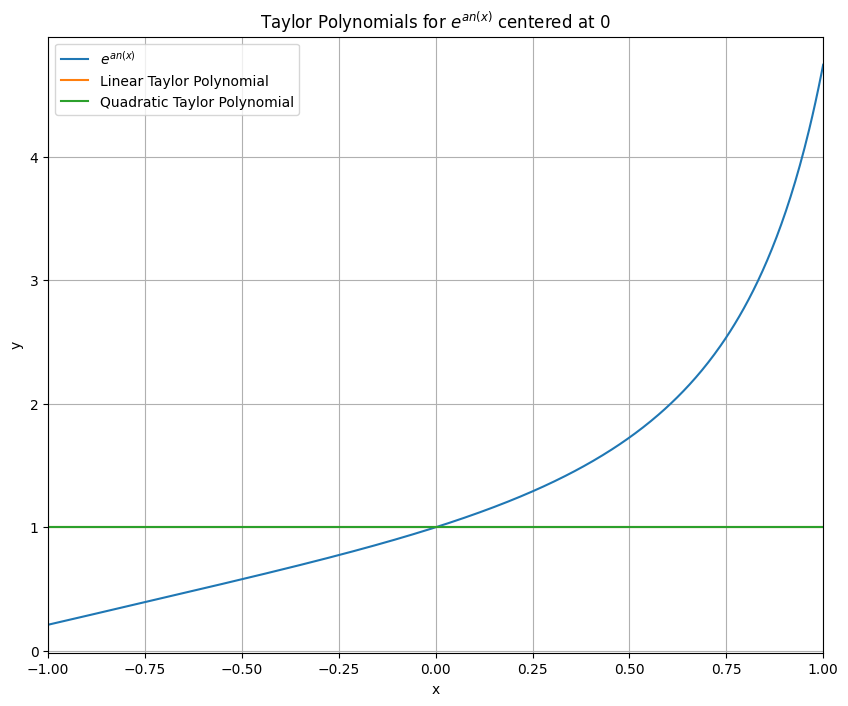

In [428]:
# 1

def func(x):
    return np.exp(np.tan(x))

def taylor_approximation(x, degree, center):
    approximation = 0
    for n in range(degree + 1):
        approximation += (np.tan(center))**n / math.factorial(n) * (x - center)**n
    return approximation

x_values = np.linspace(-1, 1, 500)

# Calculate y values for the original function and its approximations
y_func = func(x_values)

# Linear approximation
y_taylor_1 = taylor_approximation(x_values, 1, 0)

# Quadratic approximation
y_taylor_2 = taylor_approximation(x_values, 2, 0)

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_func, label='$e^{\tan(x)}$')
plt.plot(x_values, y_taylor_1, label='Linear Taylor Polynomial')
plt.plot(x_values, y_taylor_2, label='Quadratic Taylor Polynomial')
plt.title('Taylor Polynomials for $e^{\tan(x)}$ centered at 0')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

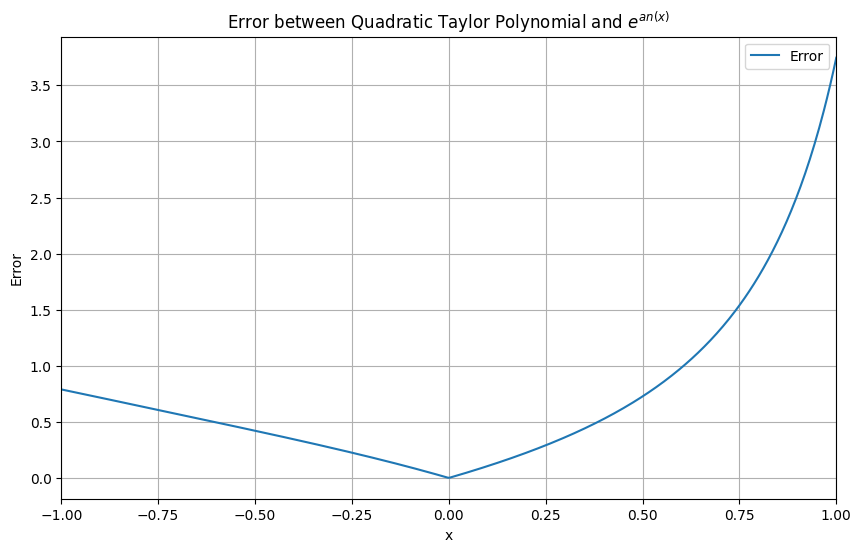

In [429]:
# 2

# the error between the Taylor polynomial of degree 2 and the exact function

error = np.abs(y_taylor_2 - y_func)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error, label='Error')
plt.title('Error between Quadratic Taylor Polynomial and $e^{\tan(x)}$')
plt.xlabel('x')
plt.ylabel('Error')
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

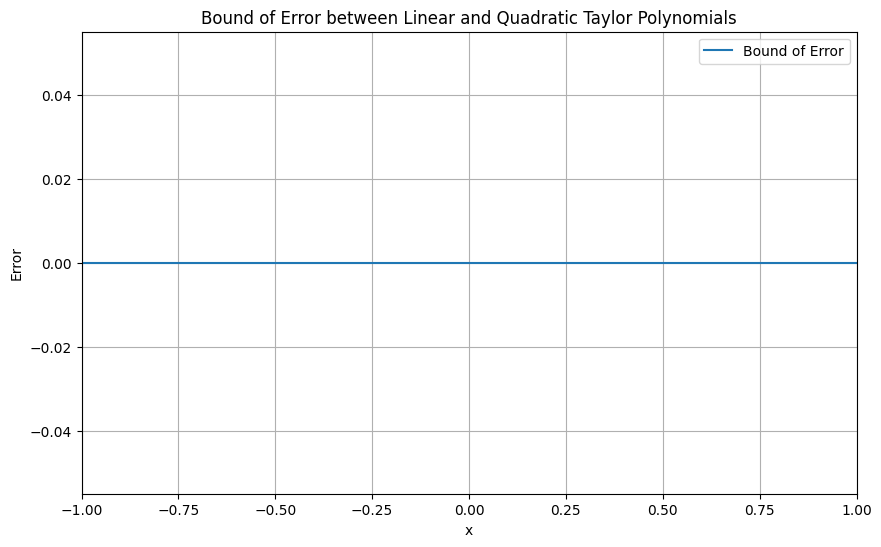

In [430]:
# 3

# the bound of the error

bound_error = np.abs(y_taylor_2 - y_taylor_1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, bound_error, label='Bound of Error')
plt.title('Bound of Error between Linear and Quadratic Taylor Polynomials')
plt.xlabel('x')
plt.ylabel('Error')
plt.xlim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

## Let $f(x)=\sqrt[3]{x}$
1. Lets find and plot $P_3(x)$ centered at $a=1$
2. Plot $P_3(x)$ and $f(x)$ for in $x\in[0,4]$
3. Plot the error between $P_3$ and $f$
3. Approxmation $\sqrt[3]{2}$ and $\sqrt[3]{3}$  using $P_3$. How far off are they?

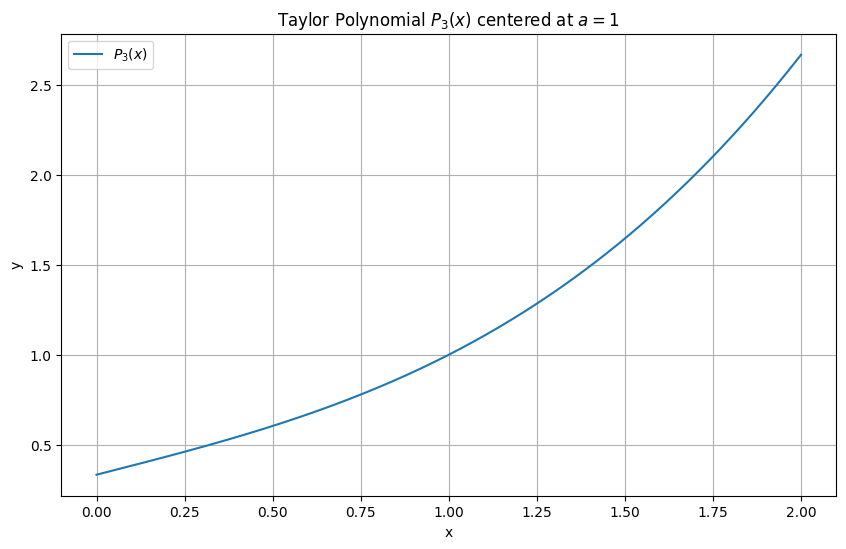

In [431]:
def func(x):
    return np.cbrt(x)

def taylor_approximation(x, degree, center):
    approximation = 0
    for n in range(degree + 1):
        approximation += (1 / math.factorial(n)) * (x - center)**n * func(center)**(1-n)
    return approximation

# find and plot P3(x) centered at a = 1

# generate x-values
x_values = np.linspace(0, 2, 500)

# get y values for the Taylor polynomial
# degree 3

y_taylor_3 = taylor_approximation(x_values, 3, 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_taylor_3, label='$P_3(x)$')
plt.title('Taylor Polynomial $P_3(x)$ centered at $a=1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

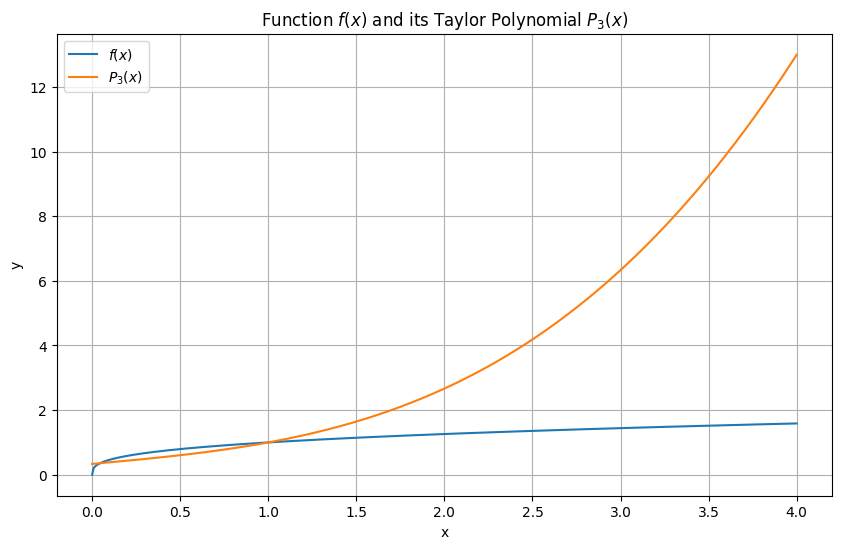

In [432]:
# P3(x) and f(x) for x in [0, 4]

x_values = np.linspace(0, 4, 500)

# y values for the function and its taylor polynomial

y_func = func(x_values)
y_taylor_3 = taylor_approximation(x_values, 3, 1)  # Degree 3

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_func, label='$f(x)$')
plt.plot(x_values, y_taylor_3, label='$P_3(x)$')
plt.title('Function $f(x)$ and its Taylor Polynomial $P_3(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

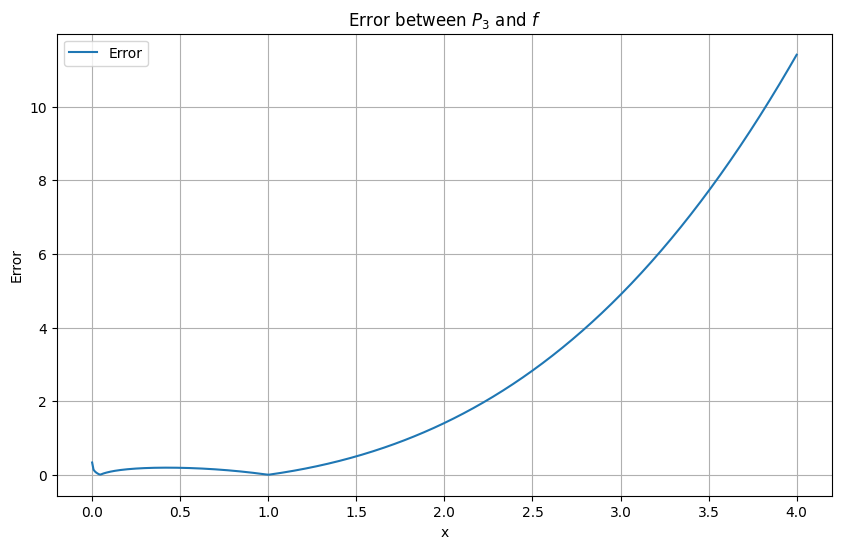

In [433]:
# the error between P3 and f

error = np.abs(y_taylor_3 - y_func)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error, label='Error')
plt.title('Error between $P_3$ and $f$')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [434]:
# approximate ∛2 and ∛3 using P3 and calculate how far off they are


# approximation of ∛2 using P3
approx_2 = taylor_approximation(2, 3, 1)

# approximation of ∛3 using P3
approx_3 = taylor_approximation(3, 3, 1)

# exact value of ∛2
exact_2 = func(2)

# exact value of ∛3
exact_3 = func(3)

# error in approximation of ∛2
error_2 = np.abs(approx_2 - exact_2)

# error in approximation of ∛3
error_3 = np.abs(approx_3 - exact_3)

print("Approximation of ∛2 using P3:", approx_2)
print("\nError in approximation of ∛2:", error_2)
print("\nApproximation of ∛3 using P3:", approx_3)
print("\nError in approximation of ∛3:", error_3)

Approximation of ∛2 using P3: 2.6666666666666665

Error in approximation of ∛2: 1.4067456167717933

Approximation of ∛3 using P3: 6.333333333333333

Error in approximation of ∛3: 4.891083763025925


## A well known approximation, when $x$ is small, is $\sin(x)\simeq x$. 
1. Lets bound the error of the approximation of $\sin(x)$ by $x$ for $-\pi/4\leq x \leq \pi/4$ using the plot. This means the maximum of $|\sin(x)-x|$ when $x$ is $-\pi/4\leq x \leq \pi/4$.
2. Bound the error using the formula.
3. Compare.

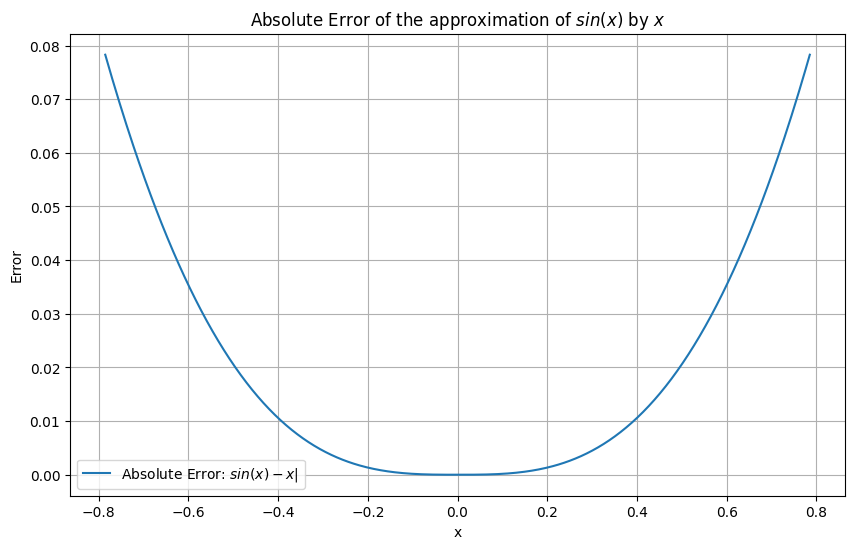

In [435]:
# 1

x_values = np.linspace(-np.pi/4, np.pi/4, 500)

absolute_error = np.abs(np.sin(x_values) - x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, absolute_error, label='Absolute Error: $sin(x) - x|$')
plt.title('Absolute Error of the approximation of $sin(x)$ by $x$')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [436]:
# 2
# maximum error occurs at x = ±π/4

x_max = np.pi/4

# from Taylor series expansion of sin(x)

error_bound_formula = x_max**3 / 6

print("Bound on the error using the formula:", error_bound_formula)

Bound on the error using the formula: 0.08074551218828077


In [437]:
# 3

max_error_plot = np.max(absolute_error)

print("Maximum error from the plot:", max_error_plot)

# compare the two methods

print("Comparison:")
if max_error_plot > error_bound_formula:
    print("The maximum error obtained from the plot is greater than the bound obtained from the formula.")
elif max_error_plot < error_bound_formula:
    print("The maximum error obtained from the plot is smaller than the bound obtained from the formula.")
else:
    print("The maximum error obtained from the plot is equal to the bound obtained from the formula.")


Maximum error from the plot: 0.07829138221090082
Comparison:
The maximum error obtained from the plot is smaller than the bound obtained from the formula.


Use `scipy.interpolate.approximate_taylor_polynomial` to compute the Taylor approximation of degreee 1,2,3,4 of $\log(1+e^x)$ at centered at $0$ (plot them and the function)

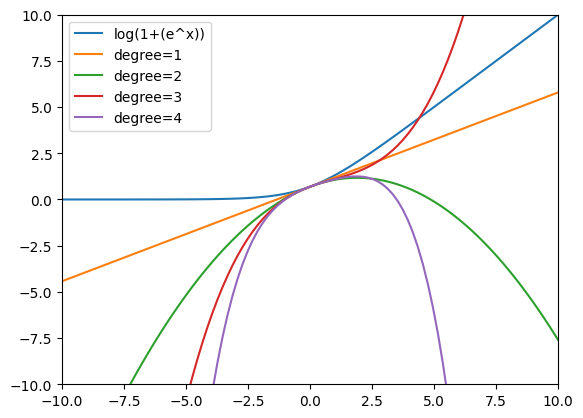

In [438]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.approximate_taylor_polynomial.htmlimport numpy as np

# referenced the above website in order to find the right syntax using 'approximate_taylor_polynomial' as well as label and plotting

x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.log(1 + np.exp(x)), label="log(1+(e^x))")

for degree in np.arange(1, 5, step=1):
    log_taylor = approximate_taylor_polynomial(np.log, 2, degree, 1, order = degree + 1)
    plt.plot(x, log_taylor(x), label=f"degree={degree}")   
plt.legend()
plt.axis([-10, 10, -10, 10])
plt.show()

## Rootfinding
Lets define newtons method!

In [439]:
def newtons(f, Df, x0, tol, itmax):
    xn = x0
    for i in range(0, itmax):
        x1 = xn - f(xn) / Df(xn)
        t = abs(x1 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x1 
    return x1, i

Testing the newton function with a polynomial I know the root of


Number of iterations:  4
The solution found is: (2.5779354745735183, 4)
1.7763568394002505e-15


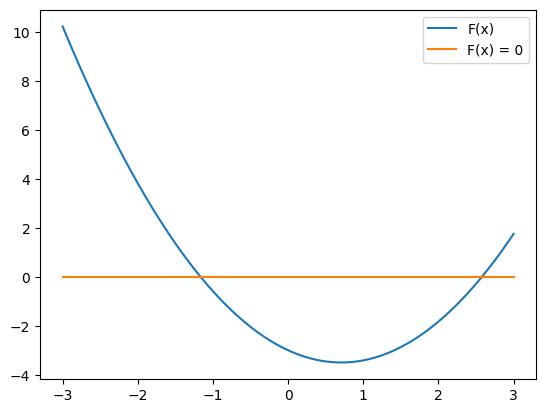

In [440]:
f = lambda x: x**2 - ((2**(1/2))*x) - 3
Df = lambda x: 2*x - (2**(1/2))
solution = newtons(f,Df,3,1e-8,10)
print('The solution found is:',solution)

error = 2.577935474573519**2 - ((2**(1/2))*2.577935474573519) - 3
print(error)

x = np.linspace(-3,3,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()


Number of iterations:  6
The solution found is: (3.7493514686823164, 6)
4.971401068587511e-11


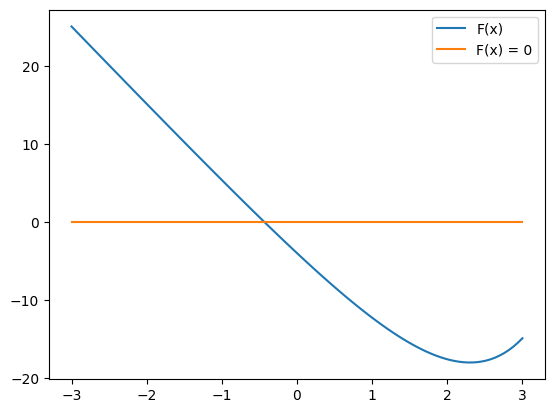

In [441]:
f = lambda x: np.exp(x) - (10*x) - 5
Df = lambda x: np.exp(x) - 10
solution2 = newtons(f,Df,3,1e-8,20)
print('The solution found is:',solution2)

error2 = np.exp(-0.4352924604616433) - (10*-0.4352924604616433) - 5
print(error2)

x = np.linspace(-3,3,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()

In [442]:
# creating a 2-dimensional array

array1 = np.zeros([3,2])
array1

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [443]:
# newtons method returns solution with iteration count in ()

f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
sol = newtons(f,Df,3,1e-10,10)
print('The solution found is: ',sol)
array1[0,:] = sol

f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
sol1 = newtons(f,Df,2,1e-10,20)
print('The solution found is: ',sol1)
array1[1,:] = sol1

f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
sol2 = newtons(f,Df,1,1e-10,30)
print('The solution found is: ',sol2)
array1[2,:] = sol2

array1


Number of iterations:  6
The solution found is:  (1.465571231876768, 6)

Number of iterations:  5
The solution found is:  (1.465571231876768, 5)

Number of iterations:  6
The solution found is:  (1.465571231876768, 6)


array([[1.46557123, 6.        ],
       [1.46557123, 5.        ],
       [1.46557123, 6.        ]])

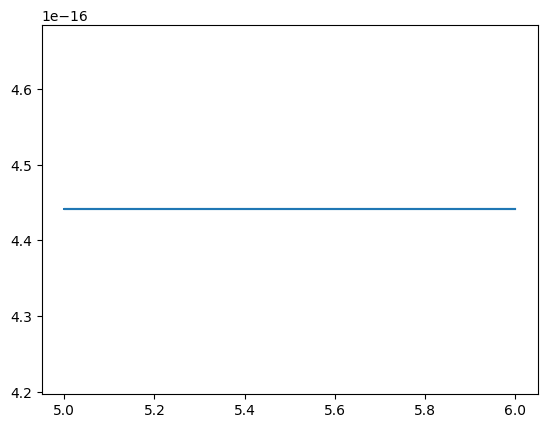

In [444]:
plt.plot(array1[:,1], np.abs(f(array1[:,0])))



## Now use the Newton's method function to find all the roots of 

$f(x)=50\sqrt 5 - 50x - 5\sqrt 5 x^2 + 5 x^3$ and $f(x)=18x^6-48x^4+18x^2+1$, both within $10^{-10}$ accuracy.


Number of iterations:  34
The solution found for the first polynomial is:  (2.500000000024469, 34)


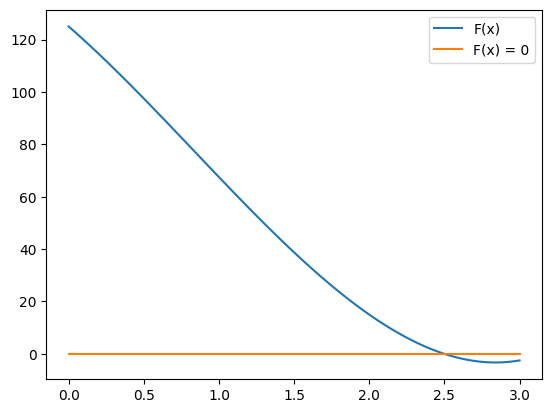


Number of iterations:  11
The solution found for the second polynomial is:  (0.717546896580653, 11)


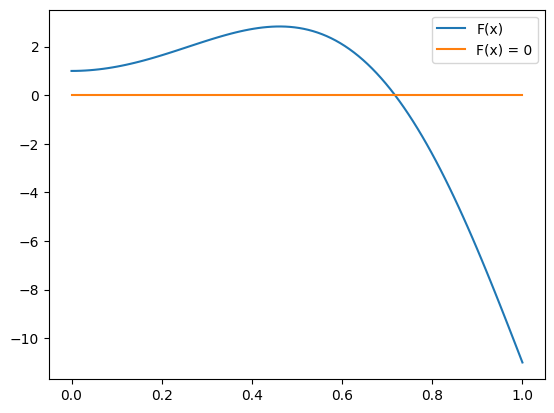

In [445]:
# first polynomial 

f = lambda x: (50*(5**1/2)) - (50*x) - (5*(5**1/2)*(x**2)) + (5*(x**3))
Df = lambda x: (15*(x**2)) - (2*(5**1.5)*x) - 50
answer1 = newtons(f,Df,1,1e-10, 50)
print('The solution found for the first polynomial is: ',answer1)

x = np.linspace(0,3,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()

# second polynomial

f = lambda x: (18*(x**6))-(48*(x**4))+(18*(x**2))+1
Df = lambda x: (108*(x**5)) - (192*(x**3)) + (32*x)
answer2 = newtons(f,Df,1,1e-10, 50)
print('The solution found for the second polynomial is: ',answer2)

x = np.linspace(0,1,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()

## Solve this equation: 
$$x^3-3x^2+3x-1=0$$ 
## using Newton's method (as accurately as possible, this means with a tolerence = $10^{-16}$)


Number of iterations:  32
The solution found for the polynomial is:  (0.9999937887658344, 32)


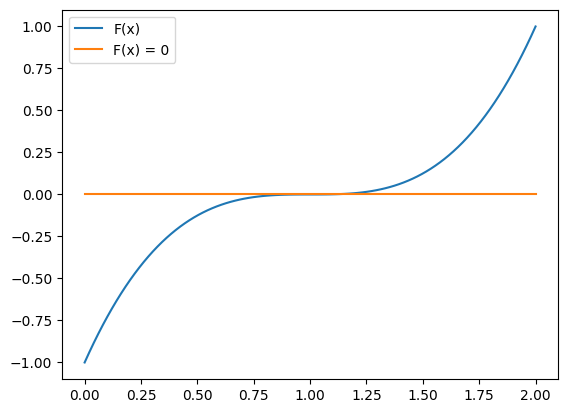

In [446]:
f = lambda x: x**3 - 3*x**2 + 3*x -1
Df = lambda x: 3*x**2 - 6*x + 3
answer3 = newtons(f,Df,2,1e-16, 50)
print('The solution found for the polynomial is: ',answer3)

x = np.linspace(0,2,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()

## Solve
### $$x + e^{\sin(x)}=0$$



Number of iterations:  15
The solution found for the polynomial is:  (-0.5787136435197241, 15)


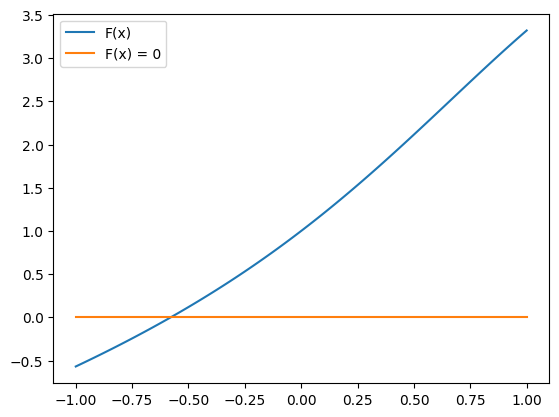

In [447]:
# create some math vars for sin , cos, and e

sin = np.sin
cos = np.cos
e = np.exp

f = lambda x: x + e(sin(x))
Df = lambda x: e(sin(x))*(cos(x)) + 1
answer4 = newtons(f,Df,2,1e-16, 50)
print('The solution found for the polynomial is: ',answer4)

x = np.linspace(-1,1,100)
plt.figure(1)
plt.clf()
plt.plot(x,f(x),label="F(x)")
plt.plot(x,f(x) == 0,label="F(x) = 0")
plt.legend()
plt.show()

## Now use the Newton method to define $\log(x)$ assuming you know the function $e^x$. Use the method with the $e^x$ function to find $\log(5)$

In [448]:
def newtons(f, Df, x0, tol, itmax):
    xn = x0
    for i in range(0, itmax):
        x1 = xn - f(xn) / Df(xn)
        t = abs(x1 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x1 
    return x1, i

f = lambda x: np.log(x)
Df = lambda x: np.exp(x) 
k = newtons(f, Df, 1.4, 1e-10, 10)
print(k)

(1.0110032730962772, 9)


## Let us compute $\sqrt[m]{a}$, with $a>0$ and $m$ a positive integer. Find a way to apply the Newton's method to this problem to find $\sqrt[m]{5}$ for $m=3,4,5,6,7,8,$ say to six significant digits.

In [449]:
def newtons_sqrt(a, m, x0, tol, itmax):
    f = lambda x: x**m - a
    Df = lambda x: m * x**(m-1)
    xn = x0
    for i in range(0, itmax):
        x1 = xn - f(xn) / Df(xn)
        t = abs(x1 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x1
    return x1, i

a = 5
m_values = [3, 4, 5, 6, 7, 8]
x0 = 1  
tol = 1e-6  
itmax = 1000  

for m in m_values:
    result, iterations = newtons_sqrt(a, m, x0, tol, itmax)
    print("m =", m, ", Result:", round(result, 6), ", Iterations:", iterations)


Number of iterations:  5
m = 3 , Result: 1.709976 , Iterations: 5

Number of iterations:  5
m = 4 , Result: 1.495349 , Iterations: 5

Number of iterations:  6
m = 5 , Result: 1.37973 , Iterations: 6

Number of iterations:  6
m = 6 , Result: 1.30766 , Iterations: 6

Number of iterations:  6
m = 7 , Result: 1.258499 , Iterations: 6

Number of iterations:  6
m = 8 , Result: 1.222845 , Iterations: 6


## Secant Method

### Write a function that take into argument a function, its derivative, an initial guess, a tolerance, a maximum number of iteration and return the zero of the function using Secant's method

In [450]:
def secant(f, x0, x1, tol, itmax):
    xn = x0
    xm = x1
    for i in range(0, itmax):
        x2 = xn - f(xn)*(xm-xn)/(f(xm)- f(xn))
        t = abs(x2 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x2
    return xn,i

### Test the Secant method function with a polynomial you know the root of

In [451]:
array = np.zeros([3,2])
array

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [452]:
def secant(f, x0, x1, tol, itmax):
    xn = x0
    xm = x1
    for i in range(0, itmax):
        x2 = xn - f(xn)*(xm-xn)/(f(xm)-f(xn))
        t = abs(x2 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x2
    return xn


# function f

f = lambda x: x**3 - x**2 - 1

# secant method for more iterations

results = []
iterations = [10, 20, 30]
for it in iterations:
    result = secant(f, 0, 2, 1e-10, it)
    results.append(result)

results


Number of iterations:  25


[1.4652320021796288, 1.465571213580155, 1.465571231742412]

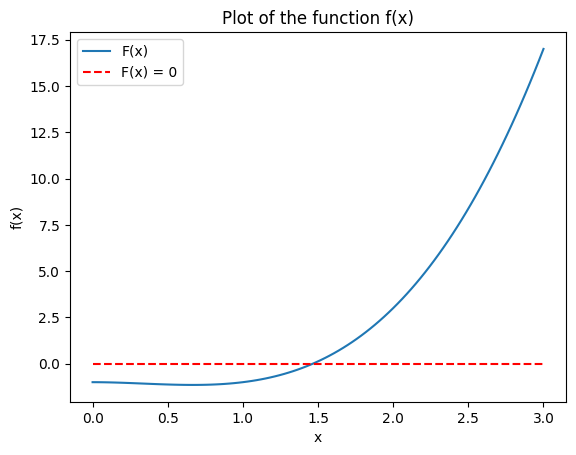

You can see from the graph that the root does seem to be around 1.4

Number of iterations:  25
Root found by secant method: 1.465571231742412


In [453]:
x = np.linspace(0, 3, 100)
plt.figure(1)
plt.clf()
plt.plot(x, f(x), label="F(x)")
plt.plot(x, np.zeros_like(x), label="F(x) = 0", linestyle='--', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.show()

print('You can see from the graph that the root does seem to be around 1.4')

# Find the root using the secant method
root = secant(f, 0, 2, 1e-10, 30)
print('Root found by secant method:', root)

## Lets solve the equation $$x + e^{\sin(x)}=0$$ using the secant's method. (as accurately as possible, this means tolerence = $10^{-16}$)



Number of iterations:  25
The solution found for the polynomial is -0.5787136435197241


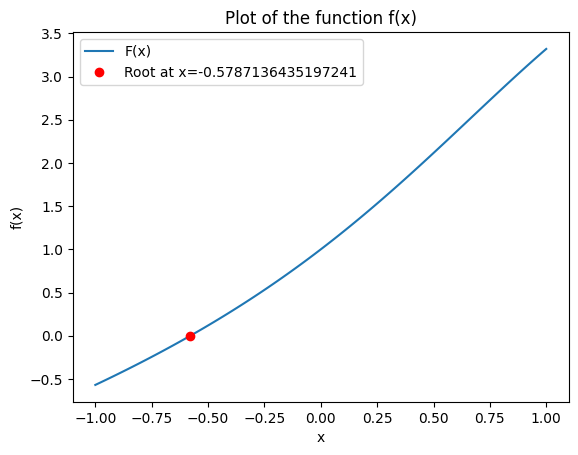

In [454]:
sin = np.sin
cos = np.cos
e = np.exp

f = lambda x: x + e(sin(x))
Df = lambda x: e(sin(x))*(cos(x)) + 1
roll = secant(f, -0.5, 0.5, 1e-16, 50)
print('The solution found for the polynomial is', roll)

x = np.linspace(-1, 1, 100)
plt.figure(1)
plt.clf()
plt.plot(x, f(x), label="F(x)")
plt.plot(roll, f(roll), 'ro', label="Root at x={}".format(roll)) 
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.show()

# Fixed Point Method

We can convert the equation $x^2-6=0$ into a fixed-point problem:
$$x=x+c(x^2-6)$$
Find a $c$  such that the fixed point methods converges to the solution.

In [455]:
def fixedpoint(f, x0, tol, itmax):
    xn = x0
    for i in range(0, itmax):
        x1 = (f(xn) - (xn))
        t = abs(x1 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        x1 = xn 
    return x1,i

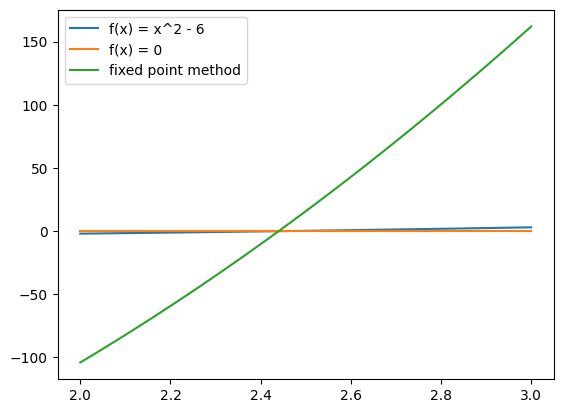

The solution to the equation (x^2 - 6 = 0) is: 2.449489742783178
The solution found for the polynomial is (2.44, 9) . The second number is the number of iterations it took (9).

As you can see from the graph, graphing fixed point method the line converges to the root of 2.44 with the c being 53


In [456]:
def fixpoint(x):
    return 53*((x**2)- 6)+ x


def function(x):
    return (x**2)-6

# graph

x=np.linspace(2,3)
plt.figure(1)
plt.clf()
plt.plot(x,function(x),label="f(x) = x^2 - 6")
plt.plot(x,x*0,label="f(x) = 0")
plt.plot(x,fixpoint(x),label="fixed point method")
plt.legend()
plt.show()

# printing the actual solution to the problem. 

print ('The solution to the equation (x^2 - 6 = 0) is:',(6**(1/2)))

f = lambda x: ((x**2) - 6)
b = fixedpoint(f,2.44,1e-10,10)
print('The solution found for the polynomial is',b,'. The second number is the number of iterations it took (9).')
print('\nAs you can see from the graph, graphing fixed point method the line converges to the root of 2.44 with the c being 53')

### Using the Newton's method Find the minimum value of $$(1-x)^2+e^{x^2}-\log( (3-x)^2)$$

In [457]:
def newtons(Df, Df2, x0, tol, itmax):
    xn = x0
    for i in range(itmax):
        x1 = xn - Df(xn) / Df2(xn)
        t = np.abs(x1 - xn)
        if t < tol:
            print("\nNumber of iterations: ", i)
            break
        xn = x1
    return xn

Df = lambda x: 2*x*(np.exp(x**2)) - (2*(1-x)) + (2/(3-x))
Df2 = lambda x: (4*x**2)*(np.exp(x**2)) + (2*(np.exp(x**2))) - (2/((3-x)**2)) + 2

m = newtons(Df, Df2, 0, 1e-10, 50)
min_value = (1 - m)**2 + np.exp(m**2) - np.log((3 - m)**2)
print('\nThe minimum value of the polynomial is:', min_value)


Number of iterations:  11

The minimum value of the polynomial is: -0.40233004341925005


##  Integration and diferentiation

### Trapezoidal and Simpson's Rules Write a function that compute the integral using the Trapezoidal Rule. The function should take in arguments $f$, $a$, $b$, and $n$ (the number of points) and return the approxiation of $\int_a^b f(x)dx$.

In [458]:
def trap(f, a, b, n):
    h = (b - a) / n
    s = (f(a)+f(b)) / 2
    for i in range(1, n):
        s += f(a + (i*h))
    s *= h 
    return (s)

## Test the trapezoid function by comparing the result from the trapezoid function and an integral that you know the exact value of. You should compute the trapezoid rule with different $n$ and see if you get closer the exact value the larger $n$ is.

------------------------------------------------------------------------------------------
function is: x^2 + x^4 + 5. With a = 4 and b = 5.

The exact value of the integral is 445.5333333

------------------------------------------------------------------------------------------
The value of the integral when n = 10 is: 
445.73832999999996

The error is:  0.2049966666999694
------------------------------------------------------------------------------------------
The value of the integral when n = 15 is: 
445.62444378600827

The error is:  0.09111045270827844
------------------------------------------------------------------------------------------
The value of the integral when n = 100 is: 
445.5353833330001

The error is:  0.0020499997000911208
------------------------------------------------------------------------------------------
The value of the integral when n = 300 is: 
445.53356111110696

The error is:  0.00022777780696969785


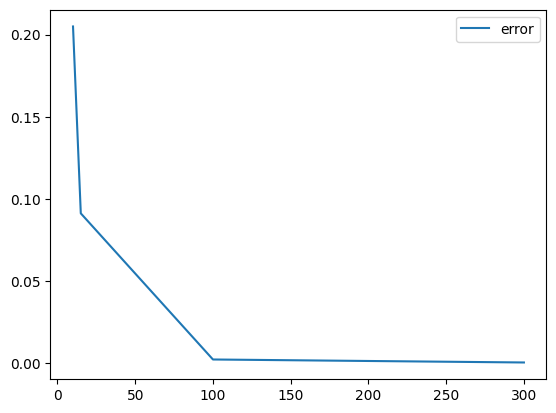

In [459]:
log = np.log

f = lambda x: x**2 + x**4 + 5
exact = 445.5333333333
print('------------------------------------------------------------------------------------------')

print('function is: x^2 + x^4 + 5. With a = 4 and b = 5.')
print('\nThe exact value of the integral is 445.5333333\n')

print('------------------------------------------------------------------------------------------')
test0 = trap(f, 4, 5, 10)
print('The value of the integral when n = 10 is: ')
print(test0)
e0 = np.abs(test0 - exact)
print("\nThe error is: ", e0)

print('------------------------------------------------------------------------------------------')
test1 = trap(f, 4, 5, 15)
print('The value of the integral when n = 15 is: ')
print(test1)
e1 = np.abs(test1 - exact)
print("\nThe error is: ", e1)

print('------------------------------------------------------------------------------------------')
test2 = trap(f, 4, 5, 100)
print('The value of the integral when n = 100 is: ')
print(test2)
e2 = np.abs(test2 - exact)
print("\nThe error is: ", e2)

print('------------------------------------------------------------------------------------------')
test3 = trap(f, 4, 5, 300)
print('The value of the integral when n = 300 is: ')
print(test3)
e3 = np.abs(test3 - exact)
print("\nThe error is: ", e3)

x_c = [10,15,100,300]
y_c = [e0,e1,e2,e3]
x = np.linspace(0,300,100)
plt.figure(1)
plt.clf()
# plt.plot(x,f(x),label="F(x)")
plt.plot(x_c,y_c, label = 'error')
plt.legend()
plt.show()

## Write a function that compute the integral using the  Simpson's Rule Rule. The function should take in arguments $f$, $a$, $b$, and $n$ (the number of points) and return the approxiation of $\int_a^b f(x)dx$.

In [460]:
def simpsons(f,a,b,n):
    h = (b-a)/n
    s = 0.0
    x = a + h
    for i in range(1,n//2 + 1):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(1,n//2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)

## Test the Simpson function by comparing the result from your simpson function and an integral that you know the exact value of. You should compute the simpson rule with different $n$ and see if you get closer the exact value the larger $n$ is.

function is: x^2 + x^4 + 5. With a = 4 and b = 5.

The exact value of the integral is 445.5333333

------------------------------------------------------------------------------------------
The value of the integral when n = 50 is: 
445.53333335466675

The error is:  2.1366759028751403e-08
------------------------------------------------------------------------------------------
The value of the integral when n = 100 is: 
445.5333333346624

The error is:  1.3624230632558465e-09
------------------------------------------------------------------------------------------
The value of the integral when n = 200 is: 
445.53333333341226

The error is:  1.1226575225009583e-10
------------------------------------------------------------------------------------------
The value of the integral when n = 300 is: 
445.5333333333546

The error is:  5.46265255252365e-11
------------------------------------------------------------------------------------------


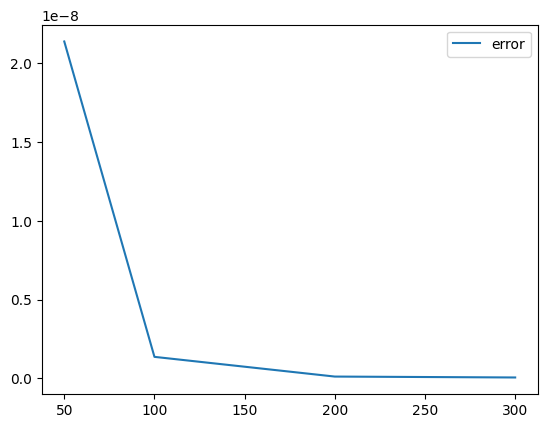

In [461]:
f = lambda x: x**2 + x**4 + 5

print('function is: x^2 + x^4 + 5. With a = 4 and b = 5.')
print('\nThe exact value of the integral is 445.5333333\n')

print('------------------------------------------------------------------------------------------')

t0 = simpsons(f, 4, 5, 50)
print('The value of the integral when n = 50 is: ')
print(t0)
er0 = np.abs(t0 - exact)
print("\nThe error is: ", er0)

print('------------------------------------------------------------------------------------------')

t1 = simpsons(f, 4, 5, 100)
print('The value of the integral when n = 100 is: ')
print(t1)
er1 = np.abs(t1 - exact)
print("\nThe error is: ", er1)

print('------------------------------------------------------------------------------------------')

t2 = simpsons(f, 4, 5, 200)
print('The value of the integral when n = 200 is: ')
print(t2)
er2 = np.abs(t2 - exact)
print("\nThe error is: ", er2)

print('------------------------------------------------------------------------------------------')

t3 = simpsons(f, 4, 5, 300)
print('The value of the integral when n = 300 is: ')
print(t3)
er3 = np.abs(t3 - exact)
print("\nThe error is: ", er3)

print('------------------------------------------------------------------------------------------')


x_c_1 = [50,100,200,300]
y_c_1 = [er0,er1,er2,er3]
x = np.linspace(0,300,100)
plt.figure(1)
plt.clf()
# plt.plot(x,f(x),label="F(x)")
plt.plot(x_c_1,y_c_1, label = 'error')
plt.legend()
plt.show()

## Use the Trapezoidal Rule and Simpson's Rule with $n=50$ to find approximate values of the following integrals:

## 1. $\int_0^{5} e^{\frac{x^2}{6}} dx$, 

## 2. $\int_0^{\pi} x^{\pi}\cos(\sqrt{x}) dx$,

## 3. $\int_0^{1} \sqrt{x^5+e^{3x}} dx$, 

In [462]:
e = np.exp
pi = np.pi
cos = np.cos

print("First integral: \n")
f = lambda x: e((x**2)/6)
trap_test = trap(f, 0, 5, 50)
print('Using the Trapezoidal rule: \n')
print(trap_test)

f = lambda x: e((x**2)/6)
simpsons_test = simpsons(f, 0, 5, 50)
print('\nUsing the Simpsons rule: \n')
print(simpsons_test)

print('--------------------------------------------------------------------------------------------')

print("Second integral: \n")
f = lambda x: (x**pi)*(cos(x**1/2))
trap_test_1 = trap(f, 0, pi, 50)
print('Using the Trapezoidal rule: \n')
print(trap_test_1)

f = lambda x: (x**pi)*(cos(x**1/2))
simpsons_test_1 = simpsons(f, 0, pi, 50)
print('\nUsing the Simpson rule: \n')
print(simpsons_test_1)

print('---------------------------------------------------------------------------------------------')

print("Third Integral: \n")
f = lambda x: ((x**5 + e(3*x))**1/2)
trap_test_2 = trap(f, 0, 1, 50)
print('Using the Trapezoidal rule: \n')
print(trap_test_2)

f = lambda x: ((x**5 + e(3*x))**1/2)
simpsons_test_2 = simpsons(f, 0, 1, 50)
print('\nUsing the Simpson rule: \n')
print(simpsons_test_2)

First integral: 

Using the Trapezoidal rule: 

46.39016606124605

Using the Simpsons rule: 

46.300863237372454
--------------------------------------------------------------------------------------------
Second integral: 

Using the Trapezoidal rule: 

7.983888640763749

Using the Simpson rule: 

7.989882446796284
---------------------------------------------------------------------------------------------
Third Integral: 

Using the Trapezoidal rule: 

3.2652937001257336

Using the Simpson rule: 

3.264256409459606


## Without using $e^x$ or $\log(x)$, lets find the value of $\log(5)$ using either the Simpson or Trapezoid rule

In [463]:
f = lambda x: 1 / x
trap = trap(f,1,5,300)
print('\nthe value of log(5) or (ln(5)) using trapezoidal method is: \n',trap)


the value of log(5) or (ln(5)) using trapezoidal method is: 
 1.6094521343933919


## Using the trapezoidal or simpson rule. Compute the area of the half circle of radius 1.

In [464]:
def trap(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

f = lambda x: ((1 - (x ** 2)) ** 0.5)
trap1 = trap(f, -1, 1, 300)
print('\nThe area computed for semi-circle is: \n', trap1)


The area computed for semi-circle is: 
 1.5704763303905234


## Numerical Derivatives

### In the following instances, find the numerical derivative of $e^{x^2}$ at $x=0$, using the backward, forward, and centered formula with $h=0.05$. Then for each approximation compute the error and  **specify which one is more accurate.**

In [465]:
def forward(f,x,h):
    r = (f(x + h) - f(x)) / (h)
    return r
    
def center(f,x,h):
    re = (f(x+h) - f(x - h)) / (2 * h)
    return re
    
def backward(f,x,h):
    res = (f(x) - f(x - h)) / (h)
    return res


The numerical derivative at the indicated point using the forward formula is:  0.05006255211590371

The error is:  0.05006255211590371

----------------------------------------------------------------------------------------

The numerical derivative at the indicated point using the center formula is:  0.0

The error is:  0.0

----------------------------------------------------------------------------------------

The numerical derivative at the indicated point using the backward formula is:  -0.05006255211590371

The error is:  0.05006255211590371

----------------------------------------------------------------------------------------

The most accurate formula is center at the numerical derivative at x = 0. The error is 0.


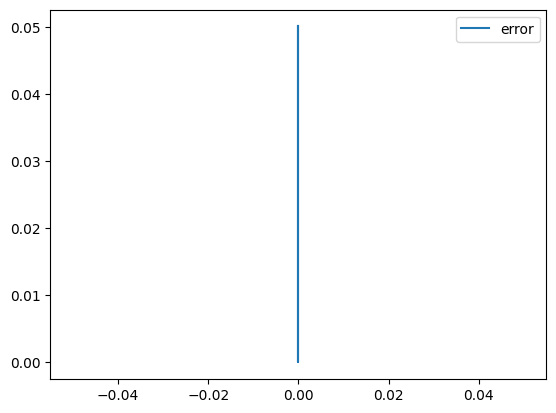

In [466]:
f = lambda x: np.exp(x**2)
exact1 = 0
k = 0.05

first_error = forward(f,0,0.05) 
print("\nThe numerical derivative at the indicated point using the forward formula is: ",firstE)
error1 = np.abs(exact1 - first_error)
print("\nThe error is: ", error1)

print("\n----------------------------------------------------------------------------------------")

second_error = center(f,0,0.05)
print("\nThe numerical derivative at the indicated point using the center formula is: ",secondE)
error2 = np.abs(exact1 - second_error) 
print("\nThe error is: ", error2)

print("\n----------------------------------------------------------------------------------------")

third_error = backward(f,0,0.05)
print("\nThe numerical derivative at the indicated point using the backward formula is: ",thirdE)
error3 = np.abs(exact1 - third_error)
print("\nThe error is: ", error3)

print("\n----------------------------------------------------------------------------------------")

print("\nThe most accurate formula is center at the numerical derivative at x = 0. The error is 0.")

x_c_2 = [0,0,0]
y_c_2 = [error1,error2,error3]
x = np.linspace(0,1,100)
plt.figure(1)
plt.clf()
# plt.plot(x,f(x),label="F(x)")
plt.plot(x_c_2,y_c_2, label = 'error')
plt.legend()
plt.show()

## In the following instances, find the numerical derivative at the indicated point, using the backward, forward, and centered formula. Use $h=0.05$.

### 1.  $\tan^{-1}(x^2)$ at $x=\frac{1}{2}$.

### 2. $\sqrt{1+\cos^2(x)}$ at $x=\pi$.

In [467]:
tan = np.arctan
pi = np.pi
cos = np.cos

print("First expression: \n")
print("\nThe indicated point is x = (1/2)")
f = lambda x: tan(x**2)
forward_tan = forward(f,(1/2),0.05)
print("\nThe numerical derivative at the indicated point using the forward formula is: \n",forward_tan)
center_tan = center(f,(1/2),0.05)
print ("\nThe numerical derivative at the indicated point using the center formula is: \n",center_tan)
backward_tan = backward(f,(1/2),0.05)
print ("\nThe numerical derivative at the indicated point using the backward formula is: \n",backward_tan)

print("\n----------------------------------------------------------------------------------------")

print("\nSecond expression: ")
print(f'The indicated point is x = {pi}')
f = lambda x: ((1 + cos(x)**2)**1/2)
forward_cos = forward(f,pi,0.05)
print ("\nThe numerical derivative at the indicated point using the forward formula is: \n",forward_cos)
center_cos = center(f,pi,0.05)
print("\nThe numerical derivative at the indicated point using the center formula is: \n",center_cos)
backward_cos = backward(f,pi,0.05)
print ("\nThe numerical derivative at the indicated point using the backward formula is: \n",backward_cos)

First expression: 


The indicated point is x = (1/2)

The numerical derivative at the indicated point using the forward formula is: 
 0.9754025650863501

The numerical derivative at the indicated point using the center formula is: 
 0.9395054514086687

The numerical derivative at the indicated point using the backward formula is: 
 0.9036083377309873

----------------------------------------------------------------------------------------

Second expression: 
The indicated point is x = 3.141592653589793

The numerical derivative at the indicated point using the forward formula is: 
 -0.024979173609871452

The numerical derivative at the indicated point using the center formula is: 
 0.0

The numerical derivative at the indicated point using the backward formula is: 
 0.024979173609871452


## Solving ODE

#### 1. Write a function for Euler method
#### 2. Write a test for your Euler function

In [468]:
# 1

def eulermethod(f, n, y0, t0, T):
    t = np.zeros(n+1, dtype=np.float32)
    y = np.zeros(n+1, dtype=np.float32)
    h = (T - t0) / n
    y[0] = y0
    t[0] = t0
    for i in range(1, n+1):
        t[i] = t0 + i * h
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y, h

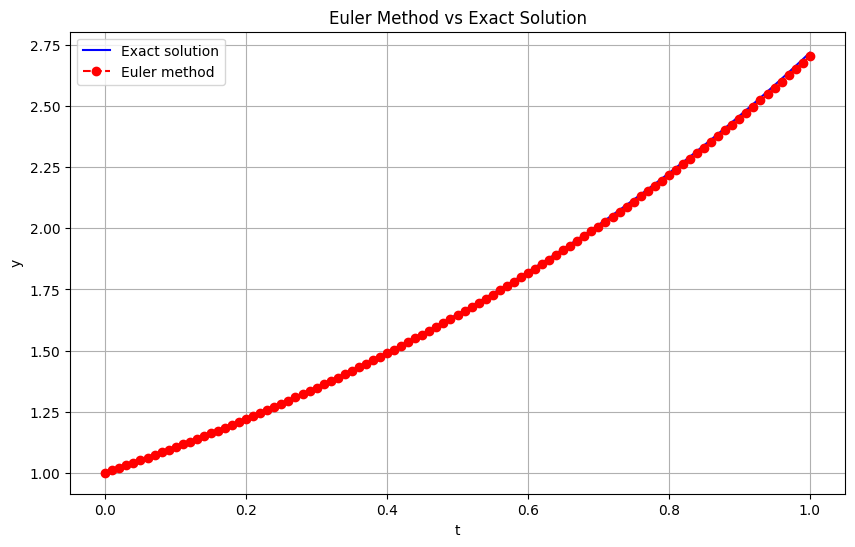

In [469]:
# 2

def f(t, y):
    return y

def y_exact(t):
    return np.exp(t)

n = 100
y0 = 1
t0 = 0
T = 1

t, y_euler, h = eulermethod(f, n, y0, t0, T)
t_exact = np.linspace(t0, T, 100)
y_exact_values = y_exact(t_exact)

plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact_values, label='Exact solution', color='blue')
plt.plot(t, y_euler, label='Euler method', linestyle='--', marker='o', color='red')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler Method vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

Error when n=100 is 0.000634
Error when n=500 is 0.000057
Error when n=1000 is 0.000020


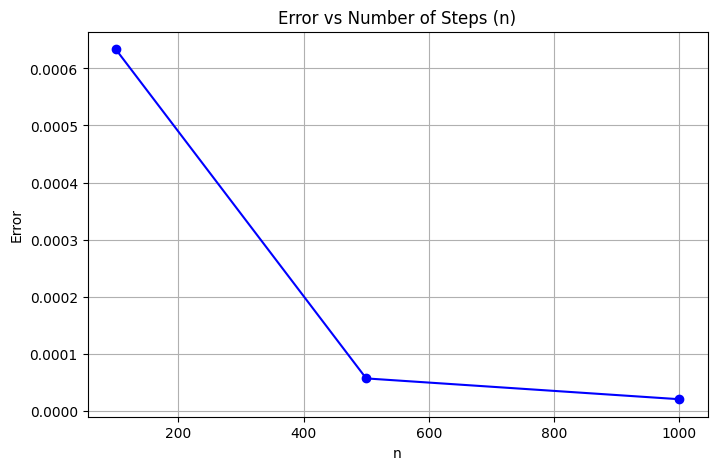

In [470]:
# Error vs number of steps (n) from 100 - 500 

n_values = [100, 500, 1000]
errors = []

for n in n_values:
    t, y_euler, h = eulermethod(f, n, 1, 0, 1)
    t_exact = np.linspace(0, 1, n+1)
    y_exact_values = y_exact(t_exact)
    error = h * np.linalg.norm(y_exact_values - y_euler)
    errors.append(error)
    print("Error when n={} is {:.6f}".format(n, error))

# errors vs n
plt.figure(figsize=(8, 5))
plt.plot(n_values, errors, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error vs Number of Steps (n)')
plt.grid(True)
plt.show()

## Runge Kutta Order 4

### 1. Write a function for Runge Kutta 4 methods

### 2. Write a test for your Runge Kutta 4 function

In [471]:
# 1

def RungeKutta4(f, n, y0, t0, T):
    h = (T - t0) / n
    t = np.zeros(n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    t[0] = t0
    for i in range(1, n + 1):
        t[i] = t0 + i * h
        k1 = h * f(t[i - 1], y[i - 1])
        k2 = h * f(t[i - 1] + h / 2, y[i - 1] + k1 / 2)
        k3 = h * f(t[i - 1] + h / 2, y[i - 1] + k2 / 2)
        k4 = h * f(t[i - 1] + h, y[i - 1] + k3)
        y[i] = y[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y, h

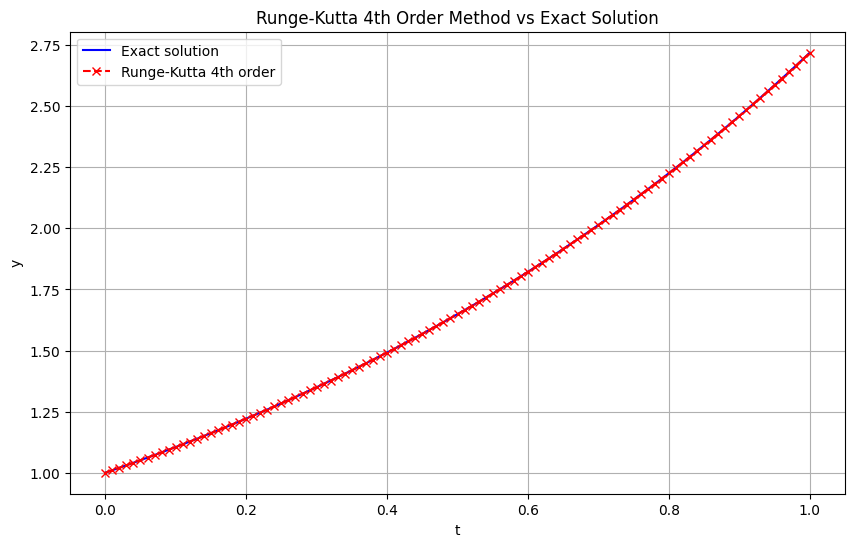

In [472]:
# 2

def f(t, y):
    return y

def y_exact(t):
    return np.exp(t)

n = 100
t0 = 0
T = 1
y0 = 1

t, y_rk4, h = RungeKutta4(f, n, y0, t0, T)
t_exact = np.linspace(t0, T, 100)
y_exact_values = y_exact(t_exact)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact_values, label='Exact solution', color='blue')
plt.plot(t, y_rk4, label='Runge-Kutta 4th order', linestyle='--', marker='x', color='red')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Runge-Kutta 4th Order Method vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

Error when n=100 is 0.000000
Error when n=500 is 0.000000
Error when n=1000 is 0.000000


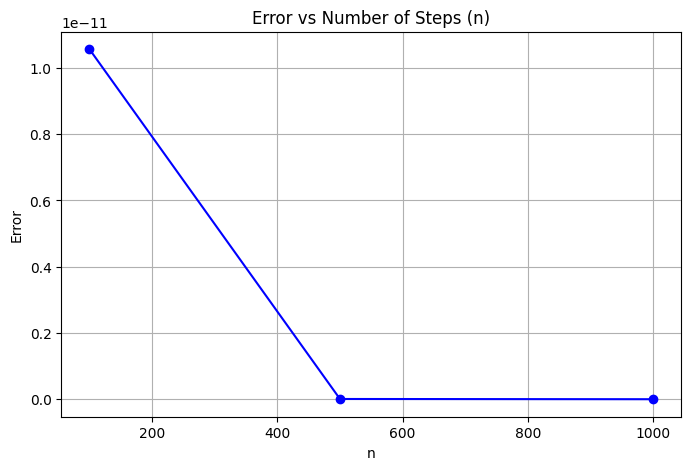

In [473]:
# error vs number of steps

n_values = [100, 500, 1000]
errors = []

for n in n_values:
    t, y_rk4, h = RungeKutta4(f, n, 1, 0, 1)
    t_exact = np.linspace(0, 1, n + 1)
    y_exact_values = y_exact(t_exact)
    error = h * np.linalg.norm(y_exact_values - y_rk4)
    errors.append(error)
    print("Error when n={} is {:.6f}".format(n, error))

# Plot errors vs n
plt.figure(figsize=(8, 5))
plt.plot(n_values, errors, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error vs Number of Steps (n)')
plt.grid(True)
plt.show()

### RungeKutta4 method is more accurate between the two method!

### Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problems. (Plot your solution for all the values of t)

### 1. $y'=2e^{-y+t}$, $0\leq t \leq 2$, $y(0)=1/2$, with $h=0.01$

### 2. $y'=\frac{1+2t}{1+2y}$, $1\leq t \leq 2$, $y(1)=1$, with $h=0.01$

### 3. $y' = t^{-2}(\cos2t - 2ty)$, $1 \leq t \leq 3$, $y(l) = 2$, with $h=0.01$

### 4. $ y' = 1+\frac{y}{t},\; 1 < t < 3, \; y(1) = 1$, with $h=0.01$

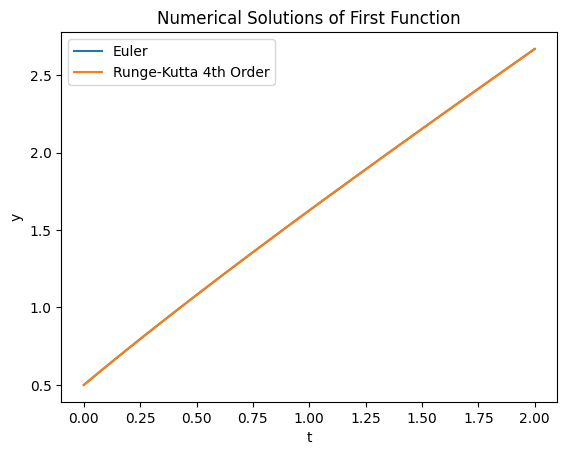

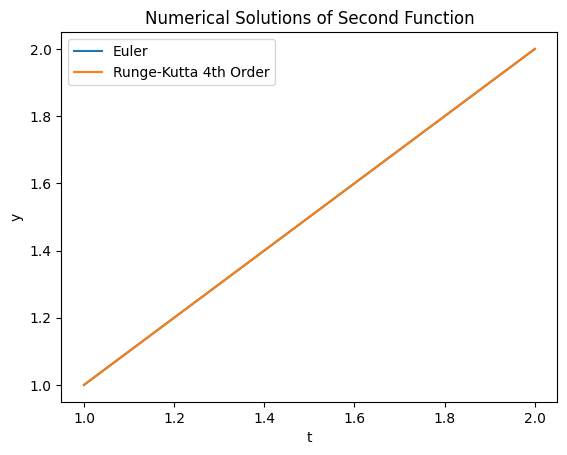

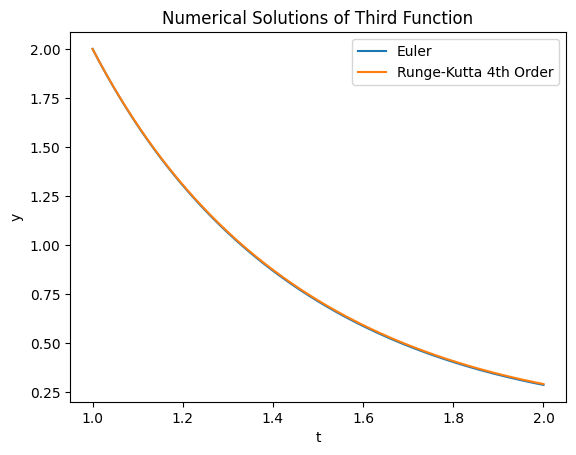

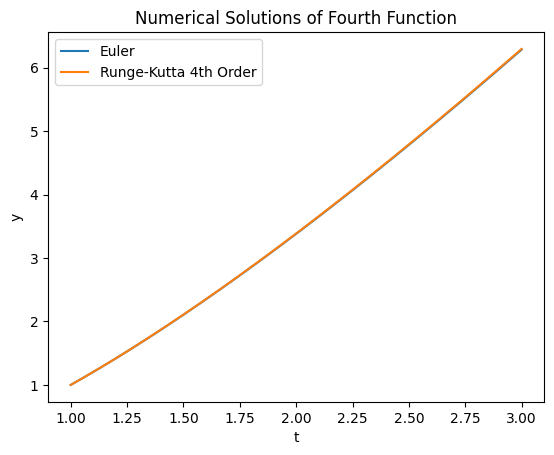

In [474]:
def eulermethod(f, n, y0, t0, T):
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    h = (T - t0) / n
    y[0] = y0
    t[0] = t0
    for i in range(1, n+1):
        t[i] = t0 + i * h
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y

# Runge-Kutta 4th order method function

def RungeKutta4(f, n, y0, t0, T):
    h = (T - t0) / n
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = t0
    for i in range(1, n+1):
        t[i] = t0 + i * h
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# first function
def f1(t, y):
    return 2 * np.exp(t - y)

# second function
def f2(t, y):
    return (1 + (2 * t)) / (1 + (2 * y))

# third function
def f3(t, y):
    return (t**-2) * (np.cos(2 * t) - (2 * t * y))

# fourth function
def f4(t, y):
    return (1 + (y / t))

# plotting for first function
t_euler, y_euler = eulermethod(f1, 200, 0.5, 0, 2)
t_rk4, y_rk4 = RungeKutta4(f1, 200, 0.5, 0, 2)
plt.plot(t_euler, y_euler, label='Euler')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions of First Function')
plt.legend()
plt.show()

# plotting for second function
t_euler, y_euler = eulermethod(f2, 100, 1, 1, 2)
t_rk4, y_rk4 = RungeKutta4(f2, 100, 1, 1, 2)
plt.plot(t_euler, y_euler, label='Euler')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions of Second Function')
plt.legend()
plt.show()

# plotting for third function
t_euler, y_euler = eulermethod(f3, 200, 2, 1, 2)
t_rk4, y_rk4 = RungeKutta4(f3, 200, 2, 1, 2)
plt.plot(t_euler, y_euler, label='Euler')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions of Third Function')
plt.legend()
plt.show()

# plotting for fourth function
t_euler, y_euler = eulermethod(f4, 200, 1, 1, 3)
t_rk4, y_rk4 = RungeKutta4(f4, 200, 1, 1, 3)
plt.plot(t_euler, y_euler, label='Euler')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4th Order')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions of Fourth Function')
plt.legend()
plt.show()

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problem.
$$ y'= \frac{2-2ty}{t^2+1}, ~~~~ 1\leq t \leq 2, ~~~~ y(1)=2, ~~~~ h=0.05$$
The actual solutions to die initial-value is given here. Compute/plot the actual error of your approximation and bound the error.
$$y(t)=\frac{2t+2}{t^2+1}$$

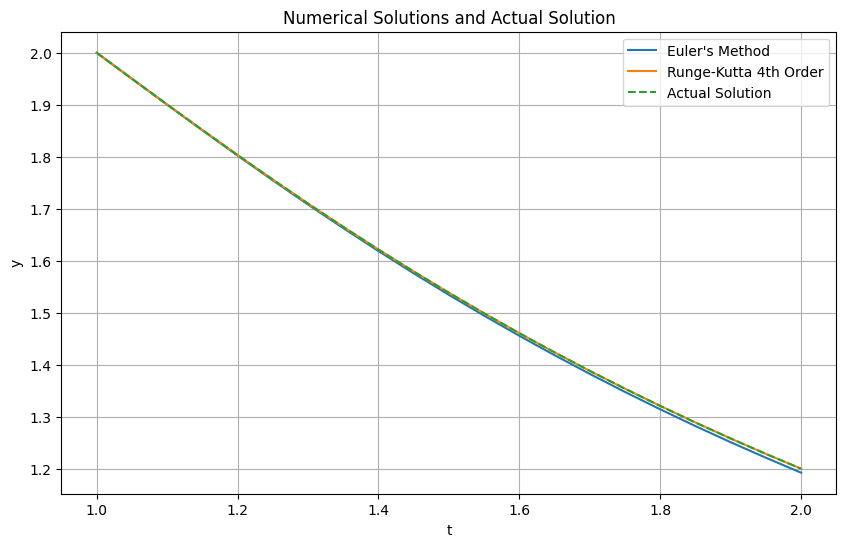

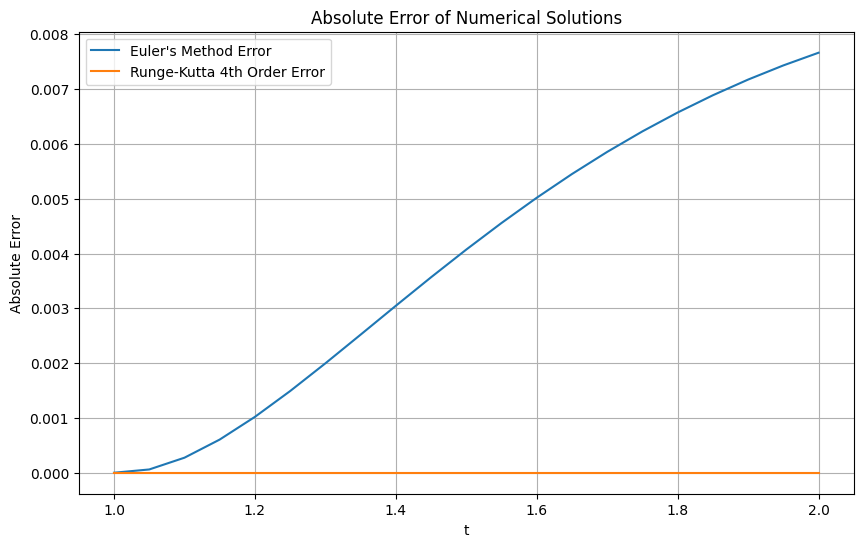

In [475]:
# Differential equation: y' = (2 - 2*t*y) / (t**2 + 1)
def f(t, y):
    return (2 - 2*t*y) / (t**2 + 1)

# Euler's method
def euler_method(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y

# Runge-Kutta 4th order method
def runge_kutta_4(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Actual solution: y(t) = (2*t + 2) / (t**2 + 1)
def actual_solution(t):
    return (2*t + 2) / (t**2 + 1)

# Define the time range and step size
t0 = 1
T = 2
h = 0.05

# Compute numerical solutions
t_euler, y_euler = euler_method(f, 2, t0, T, h)
t_rk4, y_rk4 = runge_kutta_4(f, 2, t0, T, h)

# Compute actual solutions
y_actual = actual_solution(np.linspace(t0, T, len(t_euler)))

# Compute error
error_euler = np.abs(y_euler - y_actual)
error_rk4 = np.abs(y_rk4 - y_actual)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label="Euler's Method")
plt.plot(t_rk4, y_rk4, label="Runge-Kutta 4th Order")
plt.plot(t_euler, y_actual, label="Actual Solution", linestyle='--')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions and Actual Solution')
plt.legend()
plt.grid(True)
plt.show()

# Plot the error
plt.figure(figsize=(10, 6))
plt.plot(t_euler, error_euler, label="Euler's Method Error")
plt.plot(t_rk4, error_rk4, label="Runge-Kutta 4th Order Error")
plt.xlabel('t')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()

Given the initial-value problem 
$$y'=-y+t+1,  \; 0 \leq t \leq 4, \; y(0)=1$$
The exact solution is $y(t)=e^{-t}+t$.
Approximate y(4) using Euler/RK4's method with h = 0.1, h =0.01, and h = 0.001. 

In [476]:
# Differential equation: y' = -y + t + 1
def f(t, y):
    return -y + t + 1

# Euler's method
def euler_method(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return y[-1]

# Runge-Kutta 4th order method
def runge_kutta_4(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y[-1]

# Actual solution: y(t) = e^(-t) + t
def actual_solution(t):
    return np.exp(-t) + t

# Define the step sizes
hs = [0.1, 0.01, 0.001]

# Compute y(4) using Euler's method and RK4's method for each step size
for h in hs:
    y_euler = euler_method(f, 1, 0, 4, h)
    y_rk4 = runge_kutta_4(f, 1, 0, 4, h)
    print(f"For h = {h}:")
    print(f"Approximation using Euler's method: {y_euler}")
    print(f"Approximation using RK4's method: {y_rk4}")
    print()

# Compute the actual value of y(4)
y_actual = actual_solution(4)
print(f"Actual value of y(4): {y_actual}")


For h = 0.1:
Approximation using Euler's method: 4.014780882941435
Approximation using RK4's method: 4.0183157052532055

For h = 0.01:
Approximation using Euler's method: 4.017950553275045
Approximation using RK4's method: 4.01831563889489

For h = 0.001:
Approximation using Euler's method: 4.01827901982749
Approximation using RK4's method: 4.018315638888728

Actual value of y(4): 4.018315638888734


Lokta-Volterra Equations:
$$\begin{cases}
 & \displaystyle{\frac{dx}{dt} = \alpha x - \beta xy } \\
 & \displaystyle{\frac{dy}{dt} = \delta xy - \gamma y}
 \end{cases}$$
 where
* x is the number of prey
* y is the number of some predator
* $\alpha$, $\beta$, $\gamma$, $delta$ are positive real parameters describing the interaction of the two species.
* The prey are assumed to have an unlimited food supply and to reproduce exponentially, unless subject to predation; this exponential growth is represented in the equation above by the term $\alpha x$. 
* The rate of predation upon the prey is represented above by $\beta xy$. If either x or y is zero, then there can be no predation.
* $\delta xy$ represents the growth of the predator population.
* $\gamma y$ represents the loss rate of the predators due to either natural death or emigration, it leads to an exponential decay in the absence of prey


1. Solve the Lokta-Volterra equations with  the 4 different methods, with  $\alpha= 2/3$, $\beta = 4/3$, $\gamma = 1 = \delta$
2. Try another cool set of value and solve it.


Lokta-Volterra equations: 



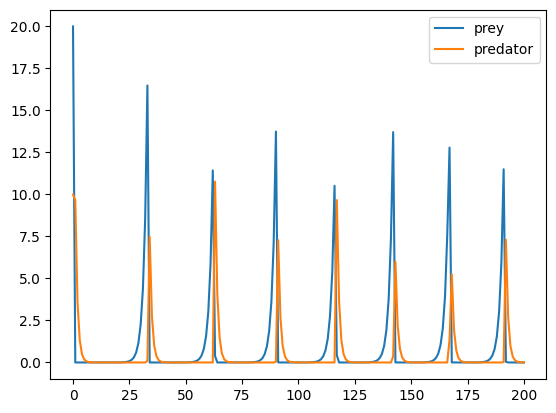

----------------------------------------

The set of data I picked: 



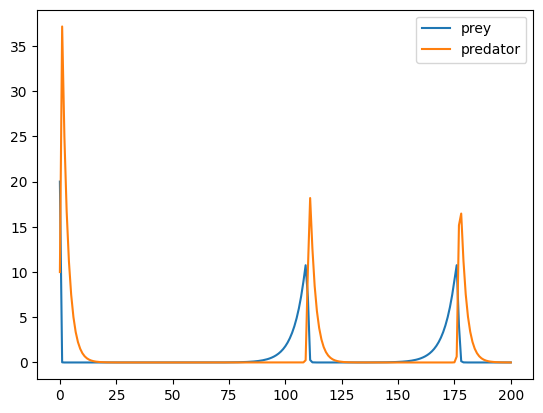

In [477]:
a = 2/3
b = 4/3
g = 1
d = 1

def f(t,y):
    return np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1] - g*y[1]])

sol = solve_ivp(f,[0,200],[20,10], t_eval = np.arange(0,201,1))

print("\n\033[94mLokta-Volterra equations: \033[94m\n")

plt.plot(sol.t,sol.y[0], label = 'prey')
plt.plot(sol.t,sol.y[1], label = 'predator')
plt.legend()
plt.show()

print('----------------------------------------')

print("\n\033[94mThe set of data I picked: \033[94m\n")


#my cool set of values!:
a = 0.2
b = 0.2
g = 0.4
d = 0.4

def f(t,y):
    return np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1] - g*y[1]])

sol = solve_ivp(f,[0,200],[20,10], t_eval = np.arange(0,201,1))
plt.plot(sol.t,sol.y[0], label = 'prey')
plt.plot(sol.t,sol.y[1], label = 'predator')
plt.legend()
plt.show()

## Competitive Lotka–Volterra equations. 4 species competing for the same resource:
$$\frac{dx_i}{dt}=r_ix_i\left(1-\sum_{j=1}^4 \alpha_{ij}x_j\right)  \mbox{ for  } i=1,2,3,4 $$

* $r_{i}$ is the rate at which the species $i$ reproduce.
* $\alpha_{ij}$ represents the effect species j has on the population of species i.

1. Solve the Competitive Lokta-Volterrra equations with
  $$r = \begin{bmatrix}
          1\\0.72\\1.53\\1.27
         \end{bmatrix}, \enspace \alpha=\begin{bmatrix}
         1 & 1.09 & 1.52 & 0\\
         0& 1 & 0.44 & 1.36 \\
         2.33 & 0 & 1 & 0.47 \\
         1.21 & 0.51 & 0.35 & 1\\
         \end{bmatrix}$$
2.  Solve another cool one.

[[0.25       0.2635062  0.27259359 0.28346301 0.29829269 0.3175108
  0.34058462 0.3656746  0.38986953 0.41015445 0.42171239 0.42282998
  0.41480043 0.39858763 0.3778557  0.35576614 0.33477885 0.31604332
  0.30012031 0.28707455 0.27625655 0.26696909 0.25834277 0.24991432
  0.24108349 0.23134034 0.22106581 0.21052516 0.20001297 0.19008153
  0.18113678 0.17396396 0.16877806 0.16597148 0.1663732  0.17004217
  0.17810876 0.19160307 0.21191033 0.24143256 0.28332405 0.3398469
  0.41158022 0.4903551  0.55849617 0.59377721 0.58867549 0.54987428
  0.4924855  0.4307607  0.37440798 0.32802042 0.29287175 0.26811073
  0.25273829 0.24528762 0.24442961 0.24880575 0.25667628 0.26651701
  0.27697304 0.28629382 0.29413679 0.30091671 0.30584103 0.30940056
  0.31177044 0.3128642  0.31308852 0.31234969 0.31073563 0.30863145
  0.30596227 0.30265043 0.29905448 0.29553431 0.29171787 0.28772937
  0.28414222 0.28068161 0.27726454 0.27450079 0.27242559 0.27063989
  0.26974339 0.27023505 0.27157586 0.27429166 0.27

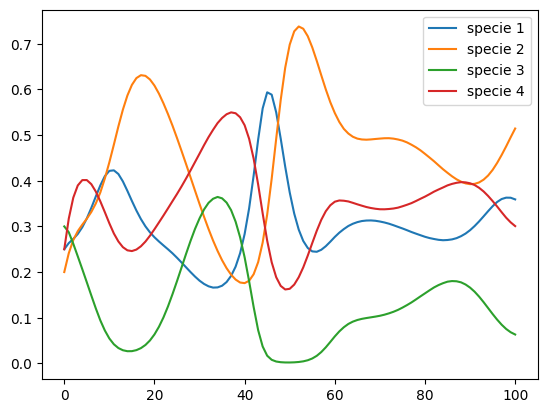


----------------------------------------------

[[0.25       0.31725239 0.43018226 0.50815839 0.5416202  0.55205832
  0.55371975 0.55179115 0.54802193 0.54338333 0.53858068 0.53389923
  0.52781628 0.5241509  0.5195769  0.51595319 0.51264856 0.50971287
  0.50720308 0.50584344 0.50273958 0.50256191 0.50127738 0.50115803
  0.50075307 0.50091695 0.50053548 0.50129151 0.50080231 0.50183477
  0.50149186 0.50183277 0.50223827 0.50198429 0.50248895 0.50257743
  0.5027129  0.50295602 0.50293636 0.50302683 0.50337652 0.50237744
  0.50322412 0.50270963 0.50311966 0.50288515 0.50321341 0.50266588
  0.50361181 0.50235926 0.50296574 0.50259516 0.50298387 0.50271514
  0.50312754 0.50266841 0.50339276 0.50293655 0.50232736 0.50286334
  0.50276704 0.50280944 0.50299709 0.5028733  0.50286077 0.50309588
  0.50250133 0.50346179 0.50212015 0.50338748 0.5022146  0.50302569
  0.50245248 0.50301045 0.50261293 0.50312219 0.50259187 0.50333439
  0.50266735 0.50274902 0.50276816 0.50286224 0.50276936 0.50301747

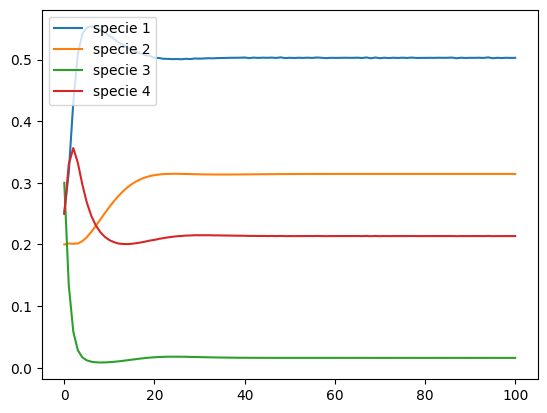

In [478]:
def f(t,y):
    return np.array([1*y[0]*(1-1*y[0] - 1.09*y[1] - 1.52*y[2] - 0*y[3]), 0.72*y[1]*(1-0*y[0] - 1*y[1] - 0.44*y[2] - 1.36*y[3]), 1.53*y[2]*(1-2.33*y[0] - 0*y[1] - 1*y[2] - 0.47*y[3]), 1.27*y[3]*(1-1.21*y[0] - 0.51*y[1] - 0.35*y[2] - 1*y[3])])

sol = solve_ivp(f,[0,100],[0.25,0.20,0.30,0.25], t_eval = np.arange(0,101,1))
print(sol.y)

print("\n\033[94mCompetitive Lokta-Volterrra equations: \033[94m\n")
plt.plot(sol.t,sol.y[0], label='specie 1')
plt.plot(sol.t,sol.y[1], label='specie 2')
plt.plot(sol.t,sol.y[2], label='specie 3')
plt.plot(sol.t,sol.y[3], label='specie 4')
plt.legend()
plt.show()

print('\n----------------------------------------------\n')

def f(t,y):
    return np.array([2*y[0]*(1-1.5*y[0] - 0.7*y[1] - 1.6*y[2] - 0*y[3]), 0.35*y[1]*(1-0.2*y[0] - 1.85*y[1] - 0.63*y[2] - 1.44*y[3]), 1.55*y[2]*(1-0.34*y[0] - 0.23*y[1] - 1.9*y[2] - 3.4*y[3]), 1.26*y[3]*(1-1.3*y[0] - 0.41*y[1] - 0.23*y[2] - 1*y[3])])
sol = solve_ivp(f,[0,100],[0.25,0.20,0.30,0.25], t_eval = np.arange(0,101,1))
print(sol.y)

print("\n\033[94mThe dataset I chose: \033[94m\n")
plt.plot(sol.t,sol.y[0], label='specie 1')
plt.plot(sol.t,sol.y[1], label='specie 2')
plt.plot(sol.t,sol.y[2], label='specie 3')
plt.plot(sol.t,sol.y[3], label='specie 4')
plt.legend()
plt.show()

## The SIR model. To learn more you can see [Compartemental Model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

* $S(t)$: the number of individuals susceptible of contracting the infection at time $t$,
* $I(t)$: the number of individuals that are alive and infected at time t;
* $R(t)$: the cumulative number of individuals that recovered from the disease up to time t;

In addition, $N$ is the total number of people in the area at time $t$ with $N = S(t) + I(t) + R(t)$.
The SIRD model is given by the following expressions:
\begin{equation} 
\begin{split}
\dfrac{dS}{dt} &=  -\frac{\beta I S}{N}, \\ 
\dfrac{dI}{dt} &=  \frac{\beta I S}{N} - \gamma I\\
\dfrac{dR}{dt} &= \gamma I,\\
\end{split}
\end{equation}

Pick $\beta$, $\gamma$, $\mu$ between $0$ and $1$ and solve this epidemic problem. What is the percentage of Recovered/Immuned indivual needed for the desease to stop spreading?


Compartemental Model:

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200]
[[3.39760810e+07 3.39758778e+07 3.39756394e+07 3.39753598e+07
  3.39750315e+07 3.39746465e+07 3.39741949e+07 3.39736651e+07
  3.39730432e+07 3.39723134e+07 3.3

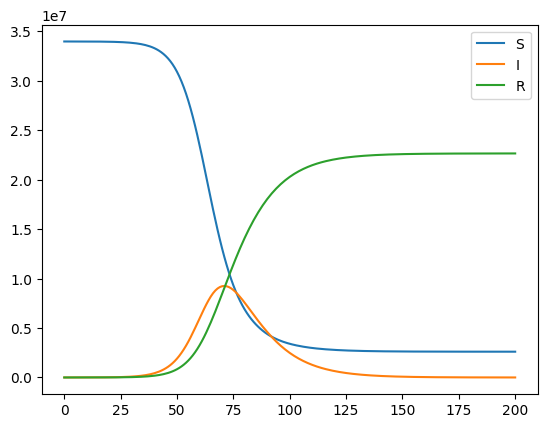

In [479]:
b = 0.25
g = 0.065
u = 0.025
n = 34000000

print("\n\033[94mCompartemental Model:\033[94m\n")

def f(t,y):
    return np.array([-b*y[1]*y[0]/n, b*y[1]*y[0]/n - g*y[1] - u*y[1], g*y[1]])

sol = solve_ivp(f,[0,200],[33976081,750,0], t_eval = np.arange(0,201,1))

print(sol.t)
print(sol.y)

plt.plot(sol.t,sol.y[0], label = 'S')
plt.plot(sol.t,sol.y[1], label = 'I')
plt.plot(sol.t,sol.y[2], label = 'R')
plt.legend()
plt.show()

## Use the Euler Implicit method to approximate/plot the solutions to each of the following initial-value. See [Euler Implicite](https://en.wikipedia.org/wiki/Backward_Euler_method).
1. $y' = -ty + 4t/y$, $0 \leq t \leq 1$, $y(0) = 1$, with $h = 0.1$
2. $y' = \frac{y^2+y}{t}$, $1 \leq  t  \leq 3$, $y(l) = -2$, with $h = 0.2$ 

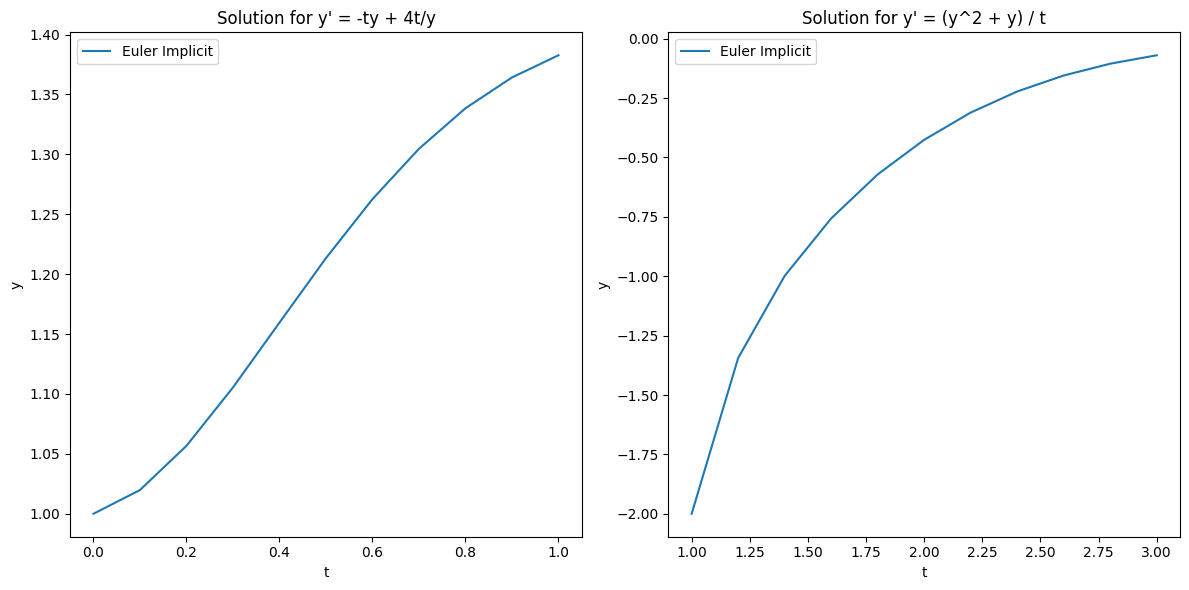

In [480]:
# first initial-value problem: y' = -t*y + 4*t/y

def f1(t, y):
    return -t*y + 4*t/y

# euler implicit method

def euler_implicit(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        
        # backward difference formula
        
        y[i] = (y[i-1] + h * f(t[i], y[i-1])) / (1 + h * t[i])
    return t, y

# second initial-value problem: y' = (y^2 + y) / t

def f2(t, y):
    return (y**2 + y) / t

# second problem
def euler_implicit_second(f, y0, t0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(1, n+1):
        
        # backward difference formula
        
        y[i] = (y[i-1] + h * f(t[i], y[i-1])) / (1 + h * t[i])
    return t, y

# define the initial conditions and step sizes

t0_1, T_1, h_1 = 0, 1, 0.1
t0_2, T_2, h_2 = 1, 3, 0.2

# solve first problem
t1, y1 = euler_implicit(f1, 1, t0_1, T_1, h_1)

# solve second problem
t2, y2 = euler_implicit_second(f2, -2, t0_2, T_2, h_2)

# plot solutions
plt.figure(figsize=(12, 6))

# plot for first problem
plt.subplot(1, 2, 1)
plt.plot(t1, y1, label="Euler Implicit")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution for y\' = -ty + 4t/y')
plt.legend()

# plot for second problem
plt.subplot(1, 2, 2)
plt.plot(t2, y2, label="Euler Implicit")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution for y\' = (y^2 + y) / t')
plt.legend()
plt.tight_layout()
plt.show()

## Solving Linear Systems

## Goal is to solve: $$Ax=b$$

For this, you can use various functions
* [scipy.lingal.inv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html) this one solve the system using $x=A^{-1}b$
* [scipy.lingal.lu_factor](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html#scipy.linalg.lu_factor) this one compute the $PLU$ factorization of $A$
* [scipy.lingal.lu_solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html) this one solve $PLUx=b$
* [scipy.lingal.solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html) this one solve directly $Ax=b$

In [481]:
A = np.array([[1,0,0],[1,4,1],[0,0,1]])

b = np.array([0.0, 24.0, 0.0])
              
np.dot(A,b)

array([ 0., 96.,  0.])

In [482]:
# inverse method

Ainverse = spl.inv(A)
print(Ainverse)
x = np.dot(Ainverse, b)
print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))

[[ 1.    0.   -0.  ]
 [-0.25  0.25 -0.25]
 [ 0.    0.    1.  ]]

x =  [0. 6. 0.]

Ax =  [ 0. 24.  0.]

b =  [ 0. 24.  0.]

error =  0.0


In [483]:
# factor method

ludecomp = spl.lu_factor(A)
print(ludecomp)
x = spl.lu_solve(ludecomp, b)

print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))

(array([[1., 0., 0.],
       [1., 4., 1.],
       [0., 0., 1.]]), array([0, 1, 2], dtype=int32))

x =  [0. 6. 0.]

Ax =  [ 0. 24.  0.]

b =  [ 0. 24.  0.]

error =  0.0


In [484]:
# solve method

x = spl.solve(A,b)

print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))


x =  [0. 6. 0.]

Ax =  [ 0. 24.  0.]

b =  [ 0. 24.  0.]

error =  0.0


## Testing the different solvers with a system I know the answers to
* Invert $A$ with **scipy.linalg.inv()**  and left-multiply the inverse to **b**.
* Use **scipy.linalg.solve()**.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()** to solve the system with the LU decomposition.

In [485]:
A = np.array([[-1,-11,-3],[1,1,0],[2,5,1]])

b = np.array([-37.0, -1.0, 10.0])
              
np.dot(A,b)

array([ 18., -38., -69.])

In [486]:
# inverse method

Ainverse = spl.inv(A)
print(Ainverse)
x = np.dot(Ainverse, b)
print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))

[[  1.  -4.   3.]
 [ -1.   5.  -3.]
 [  3. -17.  10.]]

x =  [-3.  2.  6.]

Ax =  [-37.  -1.  10.]

b =  [-37.  -1.  10.]

error =  1.9860273225978185e-15


In [487]:
# factor and solve method

ludecomp = spl.lu_factor(A)
print(ludecomp)
x = spl.lu_solve(ludecomp, b)

print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))

(array([[ 2.        ,  5.        ,  1.        ],
       [-0.5       , -8.5       , -2.5       ],
       [ 0.5       ,  0.17647059, -0.05882353]]), array([2, 2, 2], dtype=int32))

x =  [-3.  2.  6.]

Ax =  [-37.  -1.  10.]

b =  [-37.  -1.  10.]

error =  4.440892098500626e-16


In [488]:
# solve method

x = spl.solve(A,b)

print('\nx = ', x)
print('\nAx = ', np.dot(A,x))
print('\nb = ', b)
print('\nerror = ', spl.norm(np.dot(A,x)-b))


x =  [-3.  2.  6.]

Ax =  [-37.  -1.  10.]

b =  [-37.  -1.  10.]

error =  4.440892098500626e-16


## Write a function that times different **scipy.linalg** functions for solving square linear systems.

For various values of $n$, generate a random $n \times n$ matrix $A$ and a random $n$-vector $b$ using **np.random.random()**.
Time how long it takes to solve the system $Ax = b$ with each of the following approaches:

* Invert $A$ with **scipy.linalg.inv()**  and left-multiply the inverse to **b**.
* Use **scipy.linalg.solve()**.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()** to solve the system with the LU decomposition.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()**, but only time **scipy.linalg.lu_solve()** (not the time it takes to do the factorization with **scipy.linalga.lu_factor()**).

Plot the system size $n$ versus the execution times. (to time a code use **time.time()** and to create a random matrix use **np.random.random((n,n))**)

**What can you conclude?**

For n = 100

METHOD 1:
time:  0.026157140731811523
error:  2.8269029035968727e-13 

METHOD 2:
time:  0.00016498565673828125
error:  1.8085394716700164e-13 

METHOD 3:
time:  0.00011682510375976562
error:  1.8085394716700164e-13 

METHOD 4:
time:  8.821487426757812e-06
error:  1.8085394716700164e-13 


For n = 300

METHOD 1:
time:  0.29108619689941406
error:  1.0946903057336002e-12 

METHOD 2:
time:  0.2820308208465576
error:  6.159642765979111e-13 

METHOD 3:
time:  0.266801118850708
error:  6.159642765979111e-13 

METHOD 4:
time:  6.556510925292969e-05
error:  6.159642765979111e-13 


For n = 500

METHOD 1:
time:  0.3008148670196533
error:  2.2523517293826303e-10 

METHOD 2:
time:  0.27169299125671387
error:  2.7736047109359867e-11 

METHOD 3:
time:  0.2388448715209961
error:  2.7736047109359867e-11 

METHOD 4:
time:  0.00012421607971191406
error:  2.7736047109359867e-11 




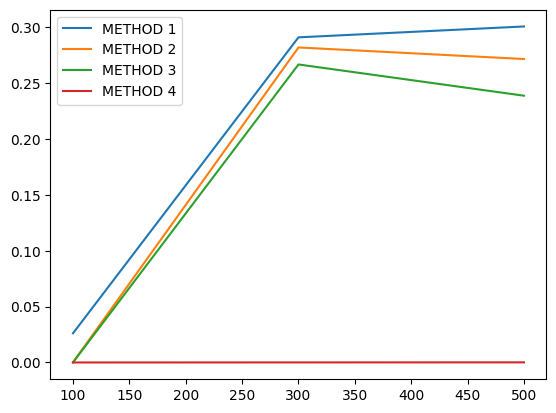

In [489]:
n = np.array([100,300,500])

method1=np.zeros(3)
method2=np.zeros(3)
method3=np.zeros(3)
method4=np.zeros(3)

for i in range (3):
    
    print(f'For n = {n[i]}\n')
    
    A = np.random.random((n[i],n[i]))
    b = np.random.random(n[i])
    
    #METHOD 1
    start = time.time()
    Ainverse = spl.inv(A)
    x = np.dot(Ainverse,b)
    end = time.time()
    method1[i] = end-start
    print('METHOD 1:')
    print('time: ', method1[i])
    print('error: ', spl.norm(np.dot(A,x)-b), '\n')
    
    #METHOD 2
    start = time.time()
    x = spl.solve(A,b)
    end = time.time()
    method2[i] = end-start
    print('METHOD 2:')
    print('time: ', method2[i])
    print('error: ', spl.norm(np.dot(A,x)-b), '\n')
    
    #METHOD 3
    start = time.time()
    lud = spl.lu_factor(A)
    x = spl.lu_solve((lud),b)
    end = time.time()
    method3[i] = end-start
    print('METHOD 3:')
    print('time: ', method3[i])
    print('error: ', spl.norm(np.dot(A,x)-b), '\n')
    
    #METHOD 4
    lud = spl.lu_factor(A)
    start = time.time()
    x = spl.lu_solve((lud),b)
    end = time.time()
    method4[i] = end-start
    print('METHOD 4:')
    print('time: ', method4[i])
    print('error: ', spl.norm(np.dot(A,x)-b), '\n\n')
    
plt.plot(n,method1, label = 'METHOD 1')
plt.plot(n,method2, label = 'METHOD 2')
plt.plot(n,method3, label = 'METHOD 3')
plt.plot(n,method4, label = 'METHOD 4')
plt.legend()
plt.show()

## Solve the systems

1. $\begin{cases}
  4x_1-2x_2+x_3&=11\\
  2x_1-x_2+x_3 &= 3\\
  x_1+2x_2+4x_3 &= 7\
  \end{cases}$

2. $\begin{cases}
  -x_1+4x_2+x_3&=1\\
  \frac{5}{3}x_1+\frac{2}{3}x_2+\frac{2}{3}x_3 &= 8\\
  2x_1+x_2+4x_3 &=-5\\
  \end{cases}$
  
3. $\begin{cases}
  x_1+x_2+x_4 &=2\\
  2x_1-x_3+x_4 &= 1\\
  -x_1+2x_2+3x_3-x_4 &= 2\\
  3x_1-x_2-x_3+2x_4 &= -3
  \end{cases}$

4. $\begin{cases}
  2x_1+x_2 &=1\\
  -x_1+2x_2+x_3 &= -2\\
  -x_2+2x_3+x_4 &= -2\\
  -x_3+2x_4+x_5 & =1.3 \\
  -x_4+2x_5 &= 0.4\end{cases}$

In [490]:
A = np.array([[7,-2,1,3], [3,10,-2,1], [-2,1,8,0], [-1,4,4,10]], dtype=np.float64)
b = np.array([5,-2,6,12])
x = spl.solve(A,b)

print('1:')
print('x = ', x)
print('Ax = ', np.dot(A,x))
print('b = ', b)
print("error: ",spl.norm(np.dot(A,x)-b), '\n')


A = np.array([[4,-2,1], [2,-1,1], [1,2,4]], dtype=np.float64)
b = np.array([11,3,7])
x = spl.solve(A,b)

print('1:')
print('x = ', x)
print('Ax = ', np.dot(A,x))
print('b = ', b)
print("error: ",spl.norm(np.dot(A,x)-b), '\n')


A = np.array([[-1,4,1], [5/3,2/3,2/3], [2,1,4]], dtype=np.float64)
b = np.array([1,8,-5])
x = spl.solve(A,b)

print('2:')
print('x = ',x)
print('Ax = ', np.dot(A,x))
print('b = ', b)
print("error: ",spl.norm(np.dot(A,x)-b), '\n')


A = np.array([[1,1,0,1], [2,0,-1,1], [-1,2,3,-1], [3,-1,-1,2]], dtype=np.float64)
b = np.array([2,1,2,-3])
x = spl.solve(A,b)

print('3:')
print('x = ',x)
print('Ax = ', np.dot(A,x))
print('b = ', b)
print("error: ",spl.norm(np.dot(A,x)-b), '\n')


A = np.array([[2,1,0,0,0], [-1,2,1,0,0], [0,-1,2,1,0], [0,0,-1,2,1], [0,0,0,-1,2]], dtype=np.float64)
b = np.array([1,-2,-2,1.3,0.4])
x = spl.solve(A,b)
print('4:')
print('x = ',x)
print('Ax = ', np.dot(A,x))
print('b = ', b)
print("error: ",spl.norm(np.dot(A,x)-b), '\n')

1:
x =  [ 0.13674141 -0.1759448   0.80617845  0.96158068]
Ax =  [ 5. -2.  6. 12.]
b =  [ 5 -2  6 12]
error:  2.220446049250313e-16 

1:
x =  [ 8.6  9.2 -5. ]
Ax =  [11.  3.  7.]
b =  [11  3  7]
error:  0.0 

2:
x =  [ 5.56521739  2.82608696 -4.73913043]
Ax =  [ 1.  8. -5.]
b =  [ 1  8 -5]
error:  8.881784197001252e-16 

3:
x =  [ 0.33333333  3.         -1.66666667 -1.33333333]
Ax =  [ 2.  1.  2. -3.]
b =  [ 2  1  2 -3]
error:  1.0175362097255202e-15 

4:
x =  [ 0.58285714 -0.16571429 -1.08571429  0.00571429  0.20285714]
Ax =  [ 1.  -2.  -2.   1.3  0.4]
b =  [ 1.  -2.  -2.   1.3  0.4]
error:  4.47545209131181e-16 



## Solve the tridiagonal system $Ax=f$ with
$$ A_{ii}=4,\enspace A_{i,i-1}=A_{i,i+1}=1 $$
for all $i$. Let the order of the system be $n=100$, and let
$$ f = [1,1,\dots, 1]^T $$

In [491]:
A = np.zeros((100,100))

f = np.zeros(100)
for i in range (100):
    f[i] = 1
for i in range (100):
    A[i][i] = 4
for i in range (1,100):
    A[i][i-1] = 1
for i in range (99):
    A[i][i+1] = 1
    
x = spl.solve(A,f)
print('\nx = ',x)
print('\nerror:', spl.norm(np.dot(A,x)-f), '\n')


x =  [0.21132487 0.15470054 0.16987298 0.16580754 0.16689687 0.16660498
 0.16668319 0.16666224 0.16666785 0.16666635 0.16666675 0.16666664
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666664 

## Minimization

### Coding the newton method for N-dimension

In [492]:
def newtonmethod(GradientF, HessianF, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - spl.solve((HessianF(x0)),GradientF(x0))
        if spl.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1 
    return x1 , i

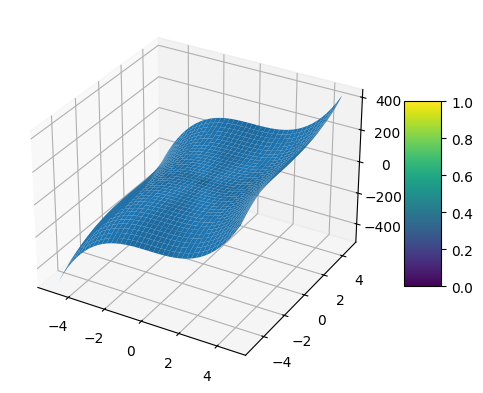

In [493]:
# practice plotting!

fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
x, y = np. meshgrid(x,y)
z = (3*x**3)+(y**3)

graph = ax.plot_surface(x, y, z)
fig.colorbar(graph, shrink=0.5, aspect=5)
plt.show()

## Testing the Newton's method

In [494]:
x0 = np.array([1])

# F(X) = 3x^5 - 4x^3 + 5

def GradientF(x):
    return np.array([ 15*x[0]**4 - 12*x[0]**2])
def HessianF(x):
    return np.array([60*x[0]**3 - 24*x[0]]) 

newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10E-5)
print ('min: ', newton)

print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [0.89443171]

Gradient:  9.70229826631197e-05 , iteration:  2


## Coding and testing the gradient descent method

In [495]:
def GradientDescent(GradientF, a, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - a*(GradientF(x0))
        if spl.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1
    return x1,i

In [496]:
def GradientF(x):
    return np.array([ 15*x[0]**4 - 12*x[0]**2])

x0 = np.array([1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)
print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)

min:  [0.89443091]

Gradient:  7.988570433070663e-05 , iteration:  40


## Minimize this equation using both methods

### $$f(x)=2x^4 − 3x^2 + 4$$

In [497]:
# minimizing using newtons method 

x0 = np.array([1])

def GradientF(x):
    return np.array([ 8*x[0]**3 - 6*x[0]])
    
def HessianF(x):
    return np.array([24*x[0]**2 - 6]) 

newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10E-5)
print ('min: ',newton)
print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [0.86602666]

Gradient:  1.5085001848547108e-05 , iteration:  2


In [498]:
# minimizing using gradient descent method: 

def GradientF(x):
    return np.array([ 8*x[0]**3 - 6*x[0]])

x0 = np.array([1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)
print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)

min:  [0.86620153]

Gradient:  0.002114149020086664 , iteration:  49


## Now do this equation using both methods:

### $$D(x_1,x_2)=x_2^4+x_1x_2+(1+x_1)^2$$

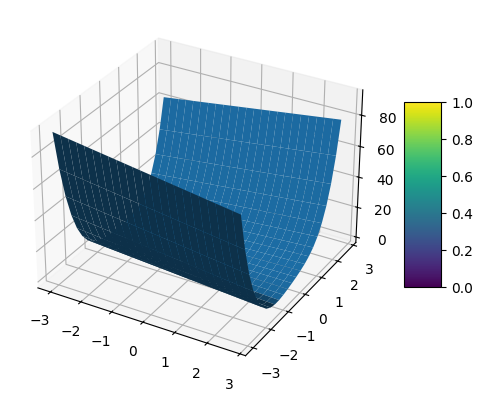

In [499]:
#plotting the graph 

fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = y**4 + x*y + (1+y)**2

surf = ax.plot_surface(x, y, z)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [500]:
# minimizing using newton

x0 = np.array([-2,2])
tolerance = 1e-16

def GradientF(x):
    return np.array([x[1] + 2 + 2*x[0], 4*x[1]**3 + x[0]])

def HessianF(x):
    return np.array([[2,1],[1, 12*x[1]**2]])
                  
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, tolerance)
print ('min: ',newton)
print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [-1.34794219  0.69588439]

Gradient:  0.0 , iteration:  7


In [501]:
# minimizing using gradient descent:

def GradientF(x):
    return np.array([4*x[0] - x[1], -x[0] + 8*x[1] - 3])

x0 = np.array([1,1])

descent, iteration = GradientDescent(GradientF, 0.01, x0, 50, 10E-5)
print('min: ',descent)
print( '\nGradient: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)

min:  [0.24132802 0.42665773]

Gradient:  0.5654288193691 , iteration:  49


### Minimize the function
### $$ f(x_1,x_2) = (1-x_2)^2+100(x_1-x_2^2)^2$$

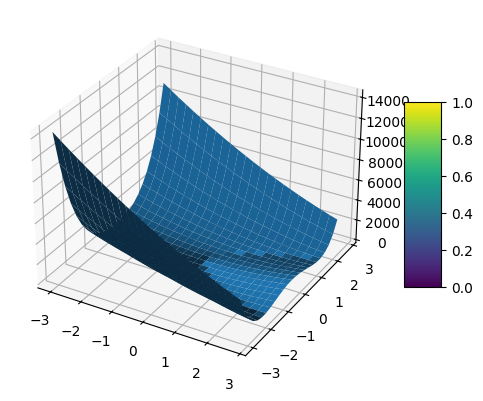

In [502]:
# plotting

fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = ((1 - y)**2) + 100*(x-(y**2))**2

graph = ax.plot_surface(x, y, z)
fig.colorbar(graph, shrink=0.5, aspect=5)
plt.show()

In [503]:
# minimizing using newtons

x0 = np.array([-1,2])

def GradientF(x):
    return np.array([200*x[0] - (200*(x[1]**2)), 400*x[1] * (-x[0] + x[1]**2) + 2*x[1] - 2])

def HessianF(x):
    return np.array([[200, -400*x[1]], [-400*x[1], -400*x[0] + 1200*x[1]**2 + 2]])
                
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, tolerance)
print ('min: ',newton)
print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [1. 1.]

Gradient:  0.0 , iteration:  5


## Minimize this function:
### $$ f(x,y) = x^2–4xy+5y^2−4y+3$$

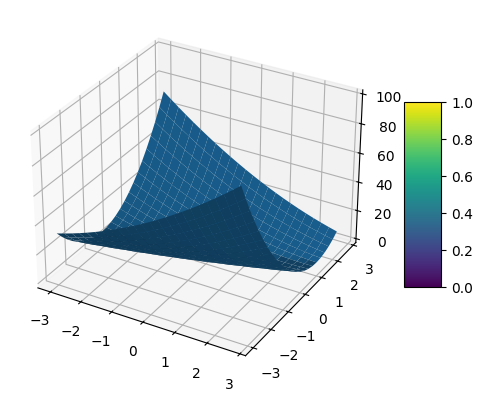

In [504]:
# plotting 

fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x = np.arange(-3,3,0.25)
y = np.arange(-3,3,0.25)
x, y = np. meshgrid(x,y)
z = x**2 - 4*x*y + 5*y**2 - 4*y + 3

surf = ax.plot_surface(x, y, z)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [505]:
#minimizing using the newton method 

x0 = np.array([1,3])

def GradientF(x):
    return np.array([(2*x[0]) - (4*x[1]), -4*x[0] + 10*x[1] - 4])

def HessianF(x):
    return np.array([[2, -4], [-4, 10]])
                   
newton, iteration = newtonmethod(GradientF, HessianF, x0, 50, 10e-16)
print ('min: ',newton)
print( '\nGradient: ', spl.norm(GradientF(newton)) ,',', 'iteration: ', iteration)

min:  [4. 2.]

Gradient:  0.0 , iteration:  0


## Regression Analysis

## Here's a introduction to my Programming for Data Applications Jupyter Notebook

1. Lets pick a data set. You can choose one from [Kaggle](https://www.kaggle.com/), or [Data World](https://data.world/). Here are some examples:
    * [College Basketball](https://www.kaggle.com/andrewsundberg/college-basketball-dataset)
    * [College Football](https://www.kaggle.com/braydenrogowski/college-football-offensive-stats-20102020/)
    * [Car MPG](https://www.amac.xyz/courses/m240/labs/car_efficiency.csv)
    * [Area vs Price](https://www.amac.xyz/courses/m240/labs/area_price.csv)
2. Do a linear regression using the following three methods:
    *  Minimizing the error with gradient descnet
    * Find the exact minimum by solving a linear system
    * Use the linear regression function from scipy/sklearn
3. Do a quadratic regression using any method you want
4. Finally, predict 2 values


**To read the file use the following command:**

```python
import pandas as pd
df = pd.read_csv("car_efficiency.csv") # read the csv file and put the data into the data frame df
values = df.values # puit all the values of the data frame into an array values, where the first column is x and the second colum is y
x = values[:,0]
y = values[:,1]
```

In [506]:
# gradient descent method 

def GradientDescent(GradientF, a, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - a*(GradientF(x0))
        if spl.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1
    return x1,i

In [507]:
# read the csv file and put the data into the data frame df

df = pd.read_csv("College-Football.csv")

# put all the values of the data frame into an array of values, where the first column is x and the second colum is y

values = df.values
values

array([['UniversityName', 'Year', 'TeamID', ..., 'TOTAL_PLAYS',
        'RUN_PERCENT', 'PASS_PERCENT'],
       ['AirForce', '2010', 'AirForce2010', ..., '916', '81.66%',
        '18.34%'],
       ['AirForce', '2011', 'AirForce2011', ..., '927', '77.99%',
        '22.01%'],
       ...,
       ['Wyoming', '2018', 'Wyoming2018', ..., '771', '64.20%', '35.80%'],
       ['Wyoming', '2019', 'Wyoming2019', ..., '831', '69.19%', '30.81%'],
       ['Wyoming', '2020', 'Wyoming2020', ..., '409', '67.24%', '32.76%']],
      dtype=object)

In [508]:
x = values[:,3]
x = x[1:]
x = x.astype(float)
print(x)

y = values[:,9]
y = y[1:]
y = y.astype(float)
(y)

[ 88. 123.  83. ... 135. 120.  62.]


array([12., 16.,  9., ...,  8., 11.,  1.])

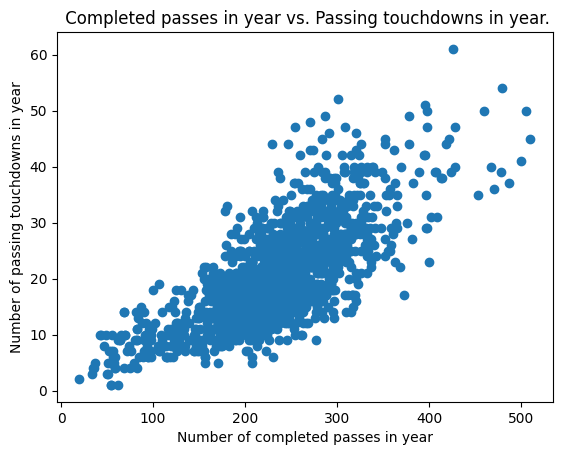

In [509]:
# graph of data

plt.scatter(x,y)
plt.title(" Completed passes in year vs. Passing touchdowns in year.")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.show()

In [510]:
# first problem using gradient descent

# a = 4 and b = 0.1

x0 = np.array([4, 0.1])
tolerance = 10E-6
N = len(x)

def GradientF(u):
    return np.array([(1/N)*np.sum([2*u[0]*(u[0]*x + u[1] - y)]),(1/N)*np.sum([2*(u[0]*x + u[1] - y)])])

def Er1(a,b):
    return ((1/N)*np.sum(a*x + b - y)**2)

descent, iteration = GradientDescent(GradientF, 0.0005, x0, 1000, tolerance)
print('A, B: ',descent)
print( '\nGradient Error: ', spl.norm(GradientF(descent)) ,',', 'iteration: ', iteration)
a = 0.09766832
b = -2.0520599
print('\nError: ', Er1(a, b) )
print('\nThe absolute value of the gradient error: ',np.abs(spl.norm(GradientF(descent))),' is less than the tolerance of: ',tolerance)
print("\nThe absolute value of the gradient error: 0.00000979499385137066 is less than the tolerance: 0.00001")

A, B:  [ 0.09766832 -2.0520599 ]

Gradient Error:  9.794993851370658e-06 , iteration:  624

Error:  4.87709248001001e-08

The absolute value of the gradient error:  9.794993851370658e-06  is less than the tolerance of:  1e-05

The absolute value of the gradient error: 0.00000979499385137066 is less than the tolerance: 0.00001


<function matplotlib.pyplot.show(close=None, block=None)>

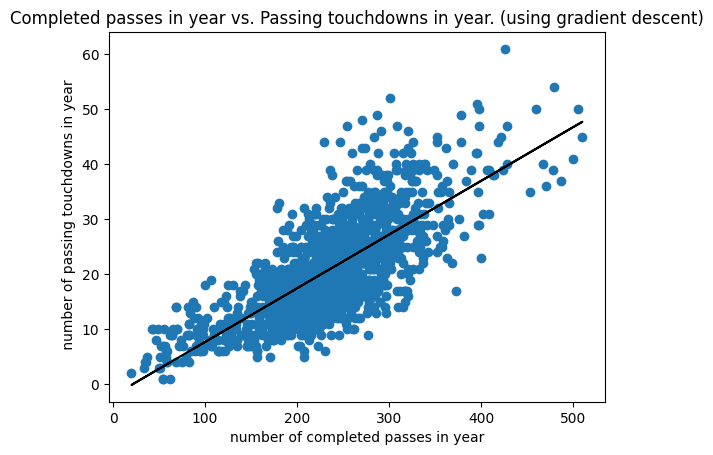

In [511]:
# graph for gradient descent

plt.scatter(x,y)
plt.plot(x,(descent[0]*x)+descent[1], 'k-')
plt.title("Completed passes in year vs. Passing touchdowns in year. (using gradient descent)")
plt.xlabel("number of completed passes in year")
plt.ylabel(" number of passing touchdowns in year")
plt.show

In [512]:
# The second problem using LU solve

A = np.array([[(1/N)*(np.sum(2*(x**2))),(1/N)*(np.sum(2*x))],[(1/N)*(np.sum(2*x)),(2)]])

b = np.array([[(1/N)*np.sum(2*x*y)],[(1/N)*np.sum(2*y)]])

g = spl.solve(A,b)

def Er2(g):
    return (1/N)*np.sum(g[0]*x + g[1] - y)**2

print('1:')
print('\na = ', g[0])
print('\nb = ', g[1])
print( '\nGradient Error: ', spl.norm(GradientF(g)) ,',', 'iteration: ', iteration)
print("\nError: ", Er2(g))

1:

a =  [0.09340277]

b =  [-1.05474712]

Gradient Error:  6.7827550943197415e-15 , iteration:  624

Error:  1.5643051953496118e-26


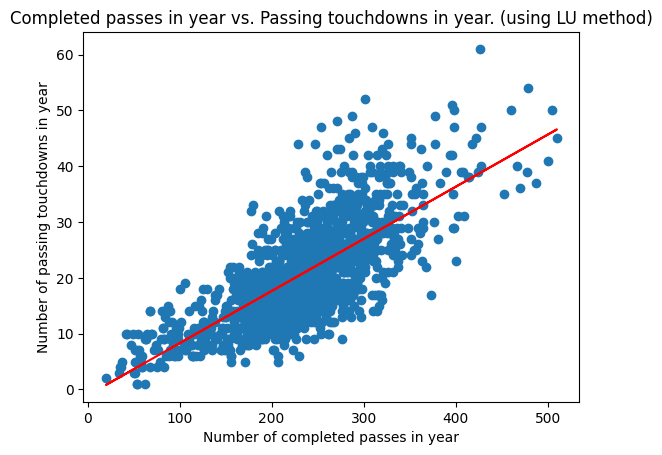

In [513]:
plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (using LU method)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.plot(x,(g[0]*x)+g[1],'r-')

LinregressResult(slope=0.09340276649600171, intercept=-1.0547471192809148, rvalue=0.7336517456971648, pvalue=3.88834547058558e-232, stderr=0.0023373048427674007, intercept_stderr=0.5709722053879234)

A =  0.09340276649600167

b =  -1.0547471192809041

Gradient error:  3.662407719504865e-15 , iteration:  624

The error is:  4.559441240839848e-27


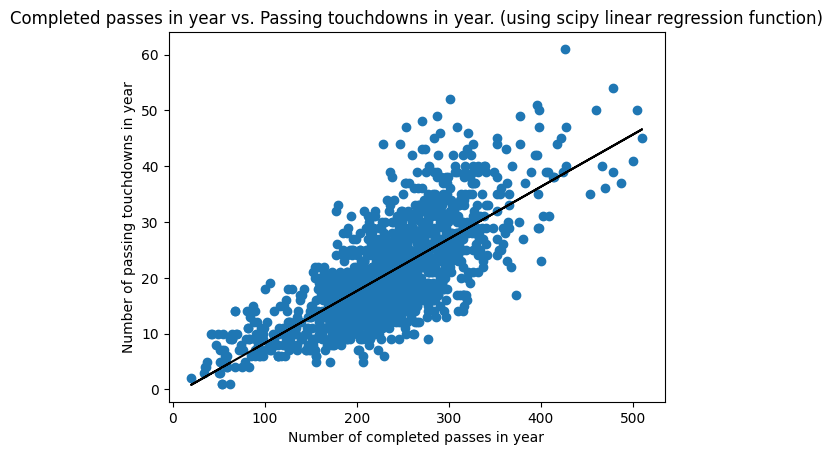

In [514]:
# this is for the third problem using the linear regression function from scipy

z = linregress(x,y)

print(z)

plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (using scipy linear regression function)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")

plt.plot(x,(z[0]*x)+z[1],'k-')

def Er3(z):
    return (1/N)*np.sum(z[0]*x + z[1] - y)**2

print('\nA = ',0.09340276649600167)
print('\nb = ',-1.0547471192809041)
print( '\nGradient error: ', spl.norm(GradientF(z)) ,',', 'iteration: ', iteration)

print('\nThe error is: ',Er3(z))

In [515]:
# quadratic regression using LU solve

p = np.array([[(1/N)*np.sum(2*(x**4)),(1/N)*np.sum(2*(x**3)),(1/N)*np.sum(2*(x**2))],[(1/N)*np.sum(2*(x**3)),(1/N)*np.sum(2*(x**2)),(1/N)*np.sum(2*x)],[(1/N)*np.sum(2*(x**2)),(1/N)*np.sum(2*x),(1/N)*np.sum(2)]])
l = np.array([[(1/N)*np.sum(2*(x**2)*y)],[(1/N)*np.sum(2*x*y)],[(1/N)*np.sum(2*y)]])

k = spl.solve(p,l)

print('\na = ', k[0])
print('\nb = ', k[1])
print('\nc = ', k[2])

def Er4(j):
    return (1/N)*np.sum(j[0]*x**2 + j[1]*x + j[2] - y)**2

def GradientFQ(k):
    return np.array([(1/N)*np.sum(2*x**2*(k[2] + k[1]*x + k[0]*(x**2) - y)),(1/N)*np.sum(2*x*(k[2] + k[1]*x + k[0]*x**2 - y)),(1/N)*np.sum(2*(k[2] + k[1]*x + k[0]*x**2 - y))])

print( '\nGradient error: ', spl.norm(GradientFQ(k)) ,',', 'iteration: ', iteration)

print('\nThe error is: ', Er4(k))


a =  [3.03893914e-05]

b =  [0.08113528]

c =  [-0.04234162]

Gradient error:  0.08462151265562885 , iteration:  624

The error is:  2.456154538615494


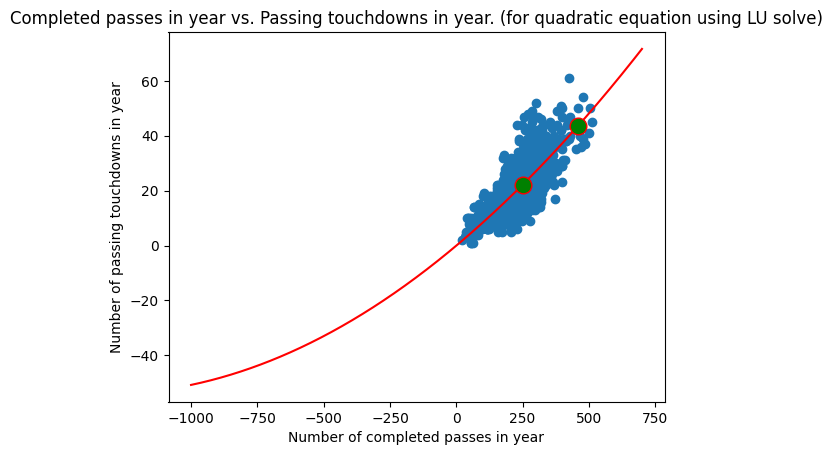

In [516]:
# graph for quadratic

x1=np.linspace(-1000,700,1000)
y1 = k[0]*x1**2 + k[1]*x1+k[2]
plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (for quadratic equation using LU solve)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.plot(x1,y1, 'r-')

#2 green markers are plotted on the quadratic regression graph. I chose the x and plotted the y coordinate

# green points are the predicted y values below

plt.plot(250, 22.140815342500005, marker="o", markersize=12, markeredgecolor="red", markerfacecolor="green")
plt.plot(460, 43.710282400240004, marker="o", markersize=12, markeredgecolor="red", markerfacecolor="green")

In [517]:
# predicting 2 values of that I ploted above (y)

In [518]:
a = 3.03893914e-05
b = 0.08113528
c = -0.04234162
x = 250

def predictor(a,b,c,x):
    y = a*(x**2) + b*x + c
    return y

print('Prediction for y is:', predictor(a,b,c,x))

Prediction for y is: 22.140815342500005


In [519]:
q = 3.03893914e-05
w = 0.08113528
e = -0.04234162
x = 460

def predictor2(q,w,e,x):
    y = q*(x**2) + w*x + e
    return y

print('Prediction for y is: ', predictor2(q,w,e,x))

Prediction for y is:  43.710282400240004
